<a href="https://colab.research.google.com/github/Paras772/AB-Inbev-Assessment-/blob/main/ABinBev_Report_500098219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file to inspect its sheets and structure
file_path = '/content/sample_data/data.xlsx'
excel_data = pd.ExcelFile(file_path)

# Display the sheet names in the Excel file
excel_data.sheet_names


['Sales_Data', 'Marketing_Data', 'Customer_Feedback_Data', 'Competitor_Data']

In [ ]:
# Load all sheets into separate DataFrames
sales_data = pd.read_excel(file_path, sheet_name='Sales_Data')
marketing_data = pd.read_excel(file_path, sheet_name='Marketing_Data')
customer_feedback_data = pd.read_excel(file_path, sheet_name='Customer_Feedback_Data')
competitor_data = pd.read_excel(file_path, sheet_name='Competitor_Data')

# Display the first few rows of each dataset to understand their structure and content
sales_data.head(), marketing_data.head(), customer_feedback_data.head(), competitor_data.head()


(  Country   Zone Product_ID   Product_Category  Units_Sold  Revenue  \
 0   China   West        P92             Juices         439  3904.98   
 1     USA  North        P50  Carbonated Drinks         720  1883.06   
 2     USA   West        P88             Juices         152  1152.97   
 3  Brazil   West        P60             Juices         224  2203.95   
 4   China   West        P75             Juices         181  2099.11   
 
    Cost_of_Goods_Sold        Date  
 0             1996.17  2024-01-01  
 1             1962.65  2024-01-01  
 2             2012.99  2024-01-01  
 3             2037.96  2024-01-01  
 4              975.75  2024-01-01  ,
    Country   Zone  Marketing_Spend Campaign_Type  Customer_Reach  \
 0  Germany   West          7699.38       Digital           82723   
 1  Germany   West         17264.02   Traditional           77123   
 2    China  South         10521.32       Digital           84307   
 3    India  North         16531.01       Digital           99506  

In [ ]:
# Reimport necessary libraries and reload the data
import pandas as pd

# Reload the Excel file
file_path = '/content/sample_data/data.xlsx'

# Reload all sheets into DataFrames
sales_data = pd.read_excel(file_path, sheet_name='Sales_Data')
marketing_data = pd.read_excel(file_path, sheet_name='Marketing_Data')
customer_feedback_data = pd.read_excel(file_path, sheet_name='Customer_Feedback_Data')
competitor_data = pd.read_excel(file_path, sheet_name='Competitor_Data')

# Data cleaning and standardization
sales_data.drop_duplicates(inplace=True)
sales_data.dropna(inplace=True)
marketing_data.drop_duplicates(inplace=True)
marketing_data.dropna(inplace=True)
customer_feedback_data.drop_duplicates(inplace=True)
customer_feedback_data.dropna(inplace=True)
competitor_data.drop_duplicates(inplace=True)
competitor_data.dropna(inplace=True)

sales_data['Date'] = pd.to_datetime(sales_data['Date'])
marketing_data['Date'] = pd.to_datetime(marketing_data['Date'])
customer_feedback_data['Date'] = pd.to_datetime(customer_feedback_data['Date'])

# Merge the datasets
merged_data = sales_data.merge(marketing_data, on=['Country', 'Zone', 'Date'], how='inner')
merged_data = merged_data.merge(customer_feedback_data, on=['Country', 'Zone', 'Product_Category', 'Date'], how='inner')
merged_data = merged_data.merge(competitor_data, on=['Country', 'Zone'], how='inner')

# Display the merged dataset's structure
merged_data.head()


,Country,Zone,Product_ID,Product_Category,Units_Sold,Revenue,Cost_of_Goods_Sold,Date,Marketing_Spend,Campaign_Type,Customer_Reach,Brand_Awareness_Score,Customer_Rating,Feedback_Type,Volume_of_Feedback,Competitor_Name,Competitor_Product_Category,Competitor_Price,Competitor_Market_Share
0,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_C,Water,6.74,49.34
1,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_A,Juices,1.46,24.03
2,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_A,Water,1.46,36.02
3,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_C,Carbonated Drinks,4.46,21.67
4,China,West,P92,Juices,439,3904.98,1996.17,2024-01-01,7406.05,Traditional,48474,9,4,Positive,256,Competitor_C,Carbonated Drinks,8.75,22.76


In [ ]:
# Convert 'Date' columns to datetime format in all datasets
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
marketing_data['Date'] = pd.to_datetime(marketing_data['Date'])
customer_feedback_data['Date'] = pd.to_datetime(customer_feedback_data['Date'])

# Check that the 'Date' columns were successfully converted
date_conversion_check = (
    sales_data['Date'].dtype,
    marketing_data['Date'].dtype,
    customer_feedback_data['Date'].dtype
)

# Merge the datasets using common keys: 'Country', 'Zone', and 'Date'
merged_data = sales_data.merge(marketing_data, on=['Country', 'Zone', 'Date'], how='inner')\
                        .merge(customer_feedback_data, on=['Country', 'Zone', 'Date'], how='inner')\
                        .merge(competitor_data, on=['Country', 'Zone'], how='inner')

# Inspect the resulting merged dataset
merged_data_info = merged_data.info()
merged_data_head = merged_data.head()

date_conversion_check, merged_data_info, merged_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420230 entries, 0 to 6420229
Data columns (total 20 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   Country                      object        
 1   Zone                         object        
 2   Product_ID                   object        
 3   Product_Category_x           object        
 4   Units_Sold                   int64         
 5   Revenue                      float64       
 6   Cost_of_Goods_Sold           float64       
 7   Date                         datetime64[ns]
 8   Marketing_Spend              float64       
 9   Campaign_Type                object        
 10  Customer_Reach               int64         
 11  Brand_Awareness_Score        int64         
 12  Product_Category_y           object        
 13  Customer_Rating              int64         
 14  Feedback_Type                object        
 15  Volume_of_Feedback           int64         
 16  

((dtype('<M8[ns]'), dtype('<M8[ns]'), dtype('<M8[ns]')),
 None,
   Country  Zone Product_ID Product_Category_x  Units_Sold  Revenue  \
 0   China  West        P92             Juices         439  3904.98   
 1   China  West        P92             Juices         439  3904.98   
 2   China  West        P92             Juices         439  3904.98   
 3   China  West        P92             Juices         439  3904.98   
 4   China  West        P92             Juices         439  3904.98   
 
    Cost_of_Goods_Sold       Date  Marketing_Spend Campaign_Type  \
 0             1996.17 2024-01-01          7406.05   Traditional   
 1             1996.17 2024-01-01          7406.05   Traditional   
 2             1996.17 2024-01-01          7406.05   Traditional   
 3             1996.17 2024-01-01          7406.05   Traditional   
 4             1996.17 2024-01-01          7406.05   Traditional   
 
    Customer_Reach  Brand_Awareness_Score Product_Category_y  Customer_Rating  \
 0           4847

In [ ]:
# Step 1: Reload all datasets and clean them
sales_data = pd.read_excel(file_path, sheet_name='Sales_Data')
marketing_data = pd.read_excel(file_path, sheet_name='Marketing_Data')
customer_feedback_data = pd.read_excel(file_path, sheet_name='Customer_Feedback_Data')
competitor_data = pd.read_excel(file_path, sheet_name='Competitor_Data')

# Step 2: Clean each dataset
for df in [sales_data, marketing_data, customer_feedback_data, competitor_data]:
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)

# Step 3: Standardize date formats
for df in [sales_data, marketing_data, customer_feedback_data]:
    df['Date'] = pd.to_datetime(df['Date'])

# Step 4: Merge datasets
merged_data = sales_data.merge(
    marketing_data, on=['Country', 'Zone', 'Date'], how='inner'
).merge(
    customer_feedback_data, on=['Country', 'Zone', 'Product_Category', 'Date'], how='inner'
).merge(
    competitor_data, on=['Country', 'Zone'], how='inner'
)

# Display the cleaned and merged dataset
print(merged_data.head())


  Country  Zone Product_ID Product_Category  Units_Sold  Revenue  \
0   China  West        P92           Juices         439  3904.98   
1   China  West        P92           Juices         439  3904.98   
2   China  West        P92           Juices         439  3904.98   
3   China  West        P92           Juices         439  3904.98   
4   China  West        P92           Juices         439  3904.98   

   Cost_of_Goods_Sold       Date  Marketing_Spend Campaign_Type  \
0             1996.17 2024-01-01          7406.05   Traditional   
1             1996.17 2024-01-01          7406.05   Traditional   
2             1996.17 2024-01-01          7406.05   Traditional   
3             1996.17 2024-01-01          7406.05   Traditional   
4             1996.17 2024-01-01          7406.05   Traditional   

   Customer_Reach  Brand_Awareness_Score  Customer_Rating Feedback_Type  \
0           48474                      9                4      Positive   
1           48474                     

In [ ]:
# Calculate Profit
merged_data['Profit'] = merged_data['Revenue'] - merged_data['Cost_of_Goods_Sold']

# Group by both Country and Zone
profit_analysis = merged_data.groupby(['Country', 'Zone', 'Product_Category'])['Profit'].sum().reset_index()

# Identify the most and least profitable country-zone-category combinations
most_profitable = profit_analysis.loc[profit_analysis['Profit'].idxmax()]
least_profitable = profit_analysis.loc[profit_analysis['Profit'].idxmin()]

print("Most Profitable Country, Zone, and Category:", most_profitable)
print("Least Profitable Country, Zone, and Category:", least_profitable)


Most Profitable Country, Zone, and Category: Country                 Germany
Zone                      South
Product_Category          Water
Profit              91709528.16
Name: 32, dtype: object
Least Profitable Country, Zone, and Category: Country                   India
Zone                      South
Product_Category          Water
Profit              20464153.92
Name: 44, dtype: object


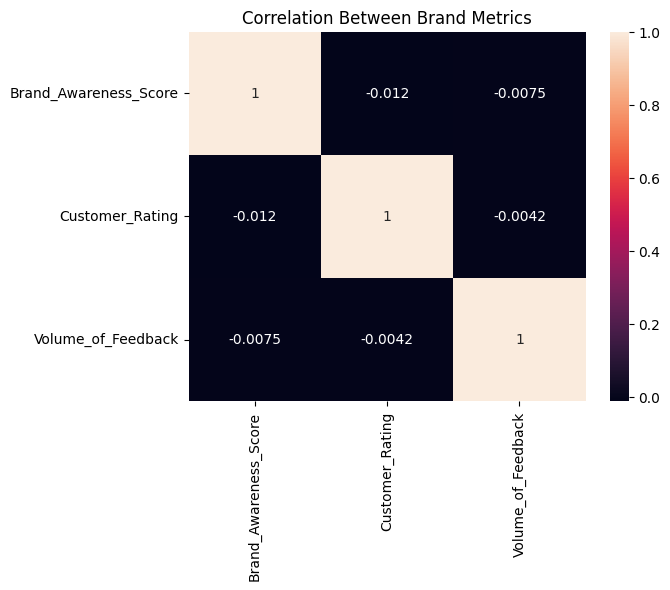

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis
correlation_data = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()
sns.heatmap(correlation_data, annot=True)
plt.title('Correlation Between Brand Metrics')
plt.show()


In [ ]:
competitor_analysis = merged_data.groupby(['Competitor_Name', 'Competitor_Product_Category']).agg({
    'Competitor_Price': 'mean',
    'Competitor_Market_Share': 'mean'
}).reset_index()

print("Competitor Analysis Summary:")
print(competitor_analysis)


Competitor Analysis Summary:
  Competitor_Name Competitor_Product_Category  Competitor_Price  \
0    Competitor_A           Carbonated Drinks          5.525617   
1    Competitor_A                      Juices          5.543806   
2    Competitor_A                       Water          5.526098   
3    Competitor_B           Carbonated Drinks          5.560313   
4    Competitor_B                      Juices          5.556417   
5    Competitor_B                       Water          5.446005   
6    Competitor_C           Carbonated Drinks          5.404004   
7    Competitor_C                      Juices          5.402879   
8    Competitor_C                       Water          5.580571   

   Competitor_Market_Share  
0                30.366587  
1                29.639560  
2                30.015001  
3                29.605858  
4                30.261375  
5                29.407787  
6                30.194750  
7                29.993094  
8                30.040555  


In [ ]:
competitor_analysis = merged_data.groupby(['Competitor_Name', 'Competitor_Product_Category']).agg({
    'Competitor_Price': 'mean',
    'Competitor_Market_Share': 'mean'
}).reset_index()

print("Competitor Analysis Summary:")
print(competitor_analysis)


Competitor Analysis Summary:
  Competitor_Name Competitor_Product_Category  Competitor_Price  \
0    Competitor_A           Carbonated Drinks          5.525617   
1    Competitor_A                      Juices          5.543806   
2    Competitor_A                       Water          5.526098   
3    Competitor_B           Carbonated Drinks          5.560313   
4    Competitor_B                      Juices          5.556417   
5    Competitor_B                       Water          5.446005   
6    Competitor_C           Carbonated Drinks          5.404004   
7    Competitor_C                      Juices          5.402879   
8    Competitor_C                       Water          5.580571   

   Competitor_Market_Share  
0                30.366587  
1                29.639560  
2                30.015001  
3                29.605858  
4                30.261375  
5                29.407787  
6                30.194750  
7                29.993094  
8                30.040555  


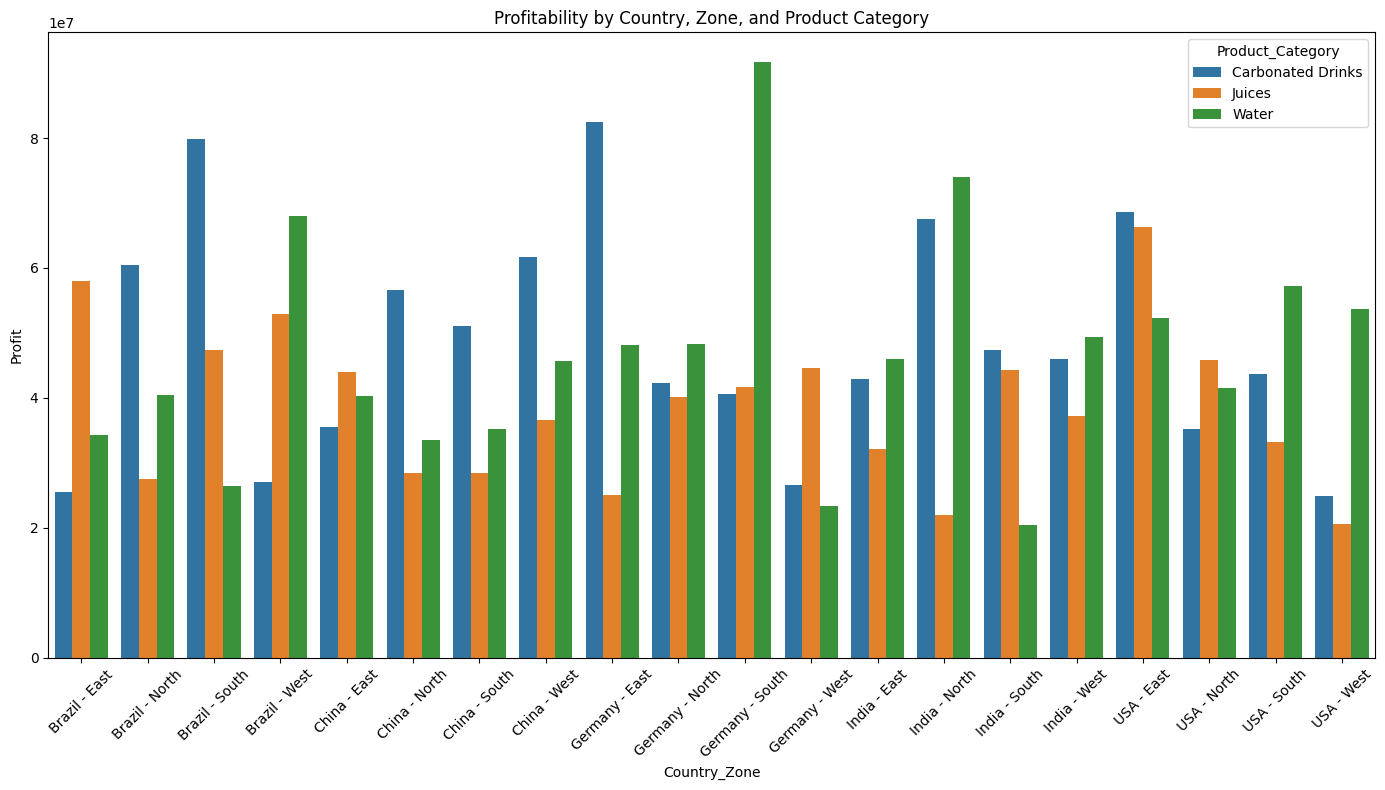

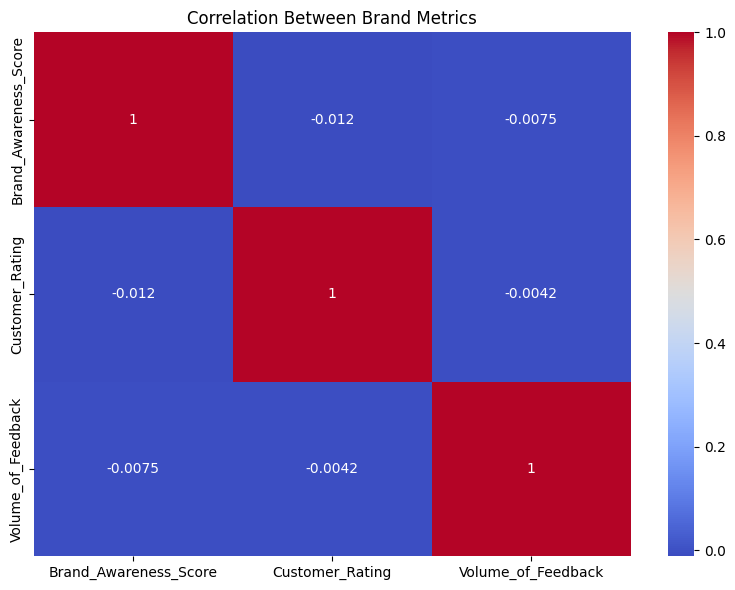

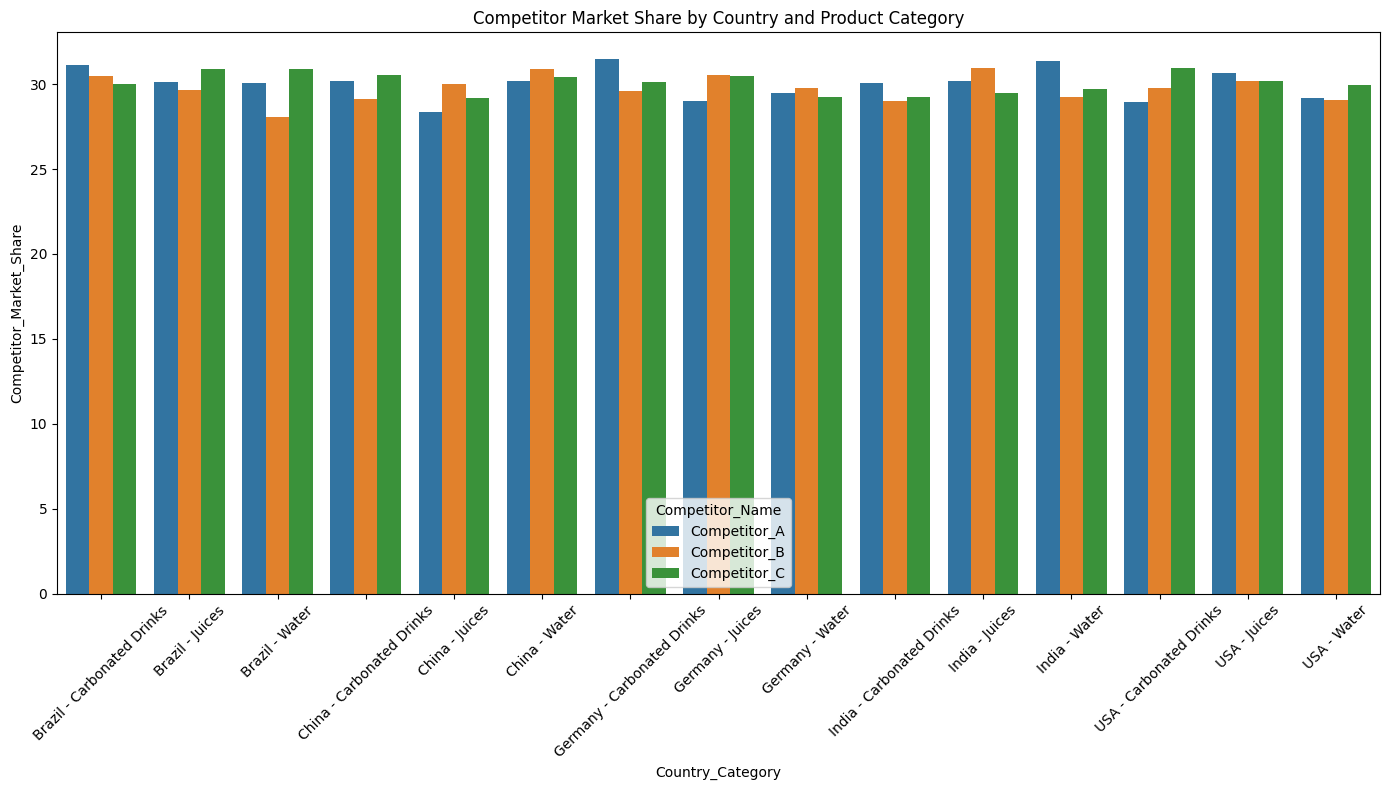

Most Profitable Country, Zone, and Category:
Country                 Germany
Zone                      South
Product_Category          Water
Profit              91709528.16
Name: 32, dtype: object

Least Profitable Country, Zone, and Category:
Country                   India
Zone                      South
Product_Category          Water
Profit              20464153.92
Name: 44, dtype: object

Competitive Analysis Summary:
    Country Competitor_Name Competitor_Product_Category  Competitor_Price  \
0    Brazil    Competitor_A           Carbonated Drinks          5.446625   
1    Brazil    Competitor_A                      Juices          5.929956   
2    Brazil    Competitor_A                       Water          5.608331   
3    Brazil    Competitor_B           Carbonated Drinks          5.728686   
4    Brazil    Competitor_B                      Juices          5.488280   
5    Brazil    Competitor_B                       Water          5.331410   
6    Brazil    Competitor_C       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
file_path = "/content/sample_data/data.xlsx"

# Load datasets
data_sales = pd.read_excel(file_path, sheet_name="Sales_Data")
data_marketing = pd.read_excel(file_path, sheet_name="Marketing_Data")
data_feedback = pd.read_excel(file_path, sheet_name="Customer_Feedback_Data")
data_competitor = pd.read_excel(file_path, sheet_name="Competitor_Data")

# Step 2: Data Cleaning
for df in [data_sales, data_marketing, data_feedback, data_competitor]:
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)

# Standardize date format
for df in [data_sales, data_marketing, data_feedback]:
    df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Merge Datasets
merged_data = data_sales.merge(
    data_marketing, on=['Country', 'Zone', 'Date'], how='inner'
).merge(
    data_feedback, on=['Country', 'Zone', 'Product_Category', 'Date'], how='inner'
).merge(
    data_competitor, on=['Country', 'Zone'], how='inner'
)

# Step 4: Profitability Analysis
merged_data['Profit'] = merged_data['Revenue'] - merged_data['Cost_of_Goods_Sold']
profitability = merged_data.groupby(['Country', 'Zone', 'Product_Category'])['Profit'].sum().reset_index()

# Identify most and least profitable
most_profitable = profitability.loc[profitability['Profit'].idxmax()]
least_profitable = profitability.loc[profitability['Profit'].idxmin()]

# Combine Country and Zone for better granularity
profitability['Country_Zone'] = profitability['Country'] + " - " + profitability['Zone']

# Visualization: Profitability by Country, Zone, and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=profitability, x='Country_Zone', y='Profit', hue='Product_Category', errorbar=None)
plt.title('Profitability by Country, Zone, and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 5: Brand Popularity Analysis
correlation_data = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Between Brand Metrics')
plt.tight_layout()
plt.show()

# Step 6: Competitive Positioning
competitor_analysis = merged_data.groupby(['Country', 'Competitor_Name', 'Competitor_Product_Category']).agg({
    'Competitor_Price': 'mean',
    'Competitor_Market_Share': 'mean'
}).reset_index()

# Combine Country and Competitor Product Category for better granularity
competitor_analysis['Country_Category'] = competitor_analysis['Country'] + " - " + competitor_analysis['Competitor_Product_Category']

# Visualization: Competitor Market Share by Country and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=competitor_analysis, x='Country_Category', y='Competitor_Market_Share', hue='Competitor_Name', errorbar=None)
plt.title('Competitor Market Share by Country and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 7: Recommendations
print("Most Profitable Country, Zone, and Category:")
print(most_profitable)

print("\nLeast Profitable Country, Zone, and Category:")
print(least_profitable)

print("\nCompetitive Analysis Summary:")
print(competitor_analysis)

# Save cleaned dataset
merged_data.to_csv("Cleaned_Merged_Dataset.csv", index=False)


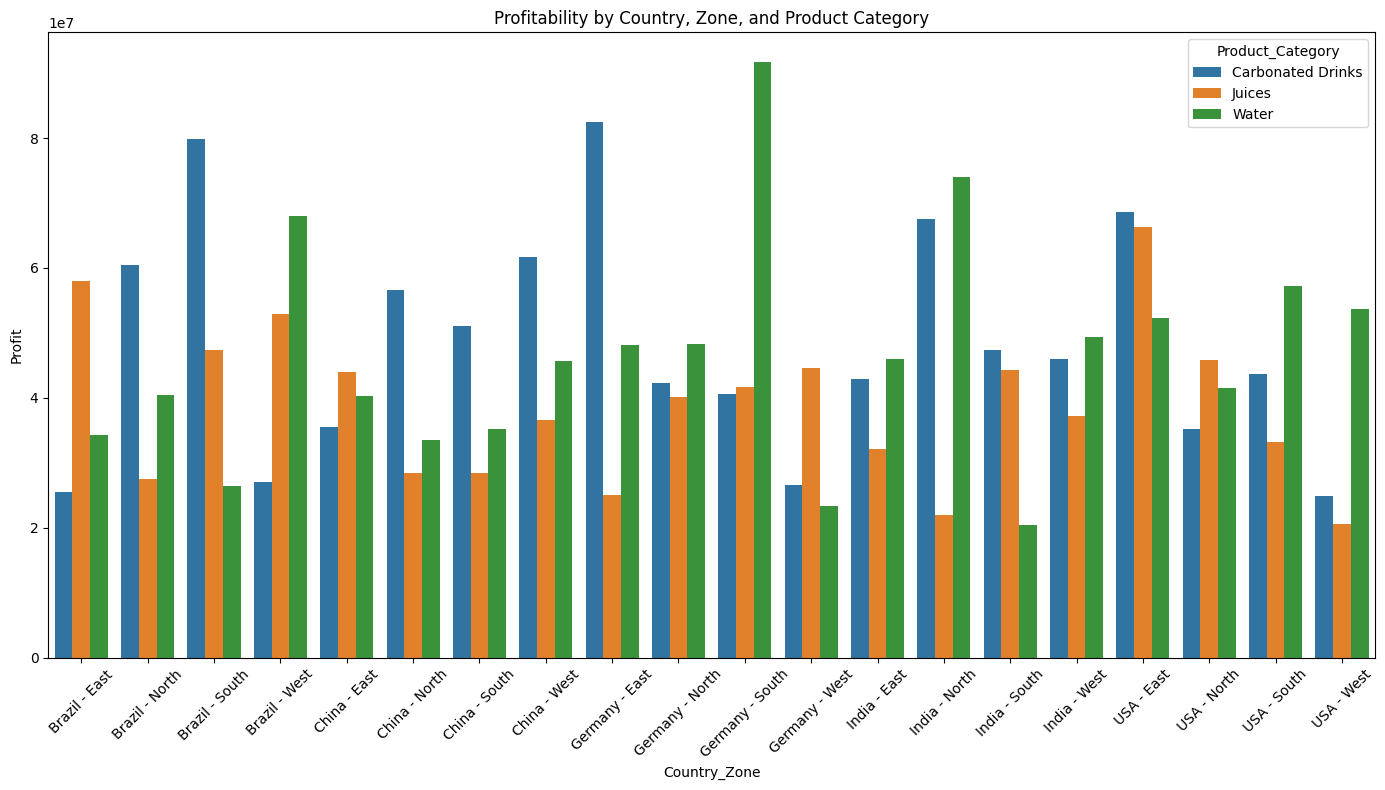

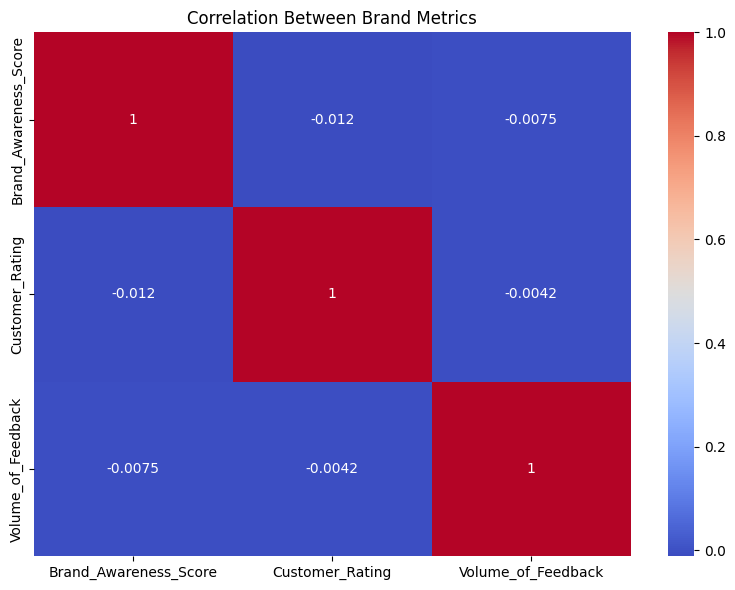

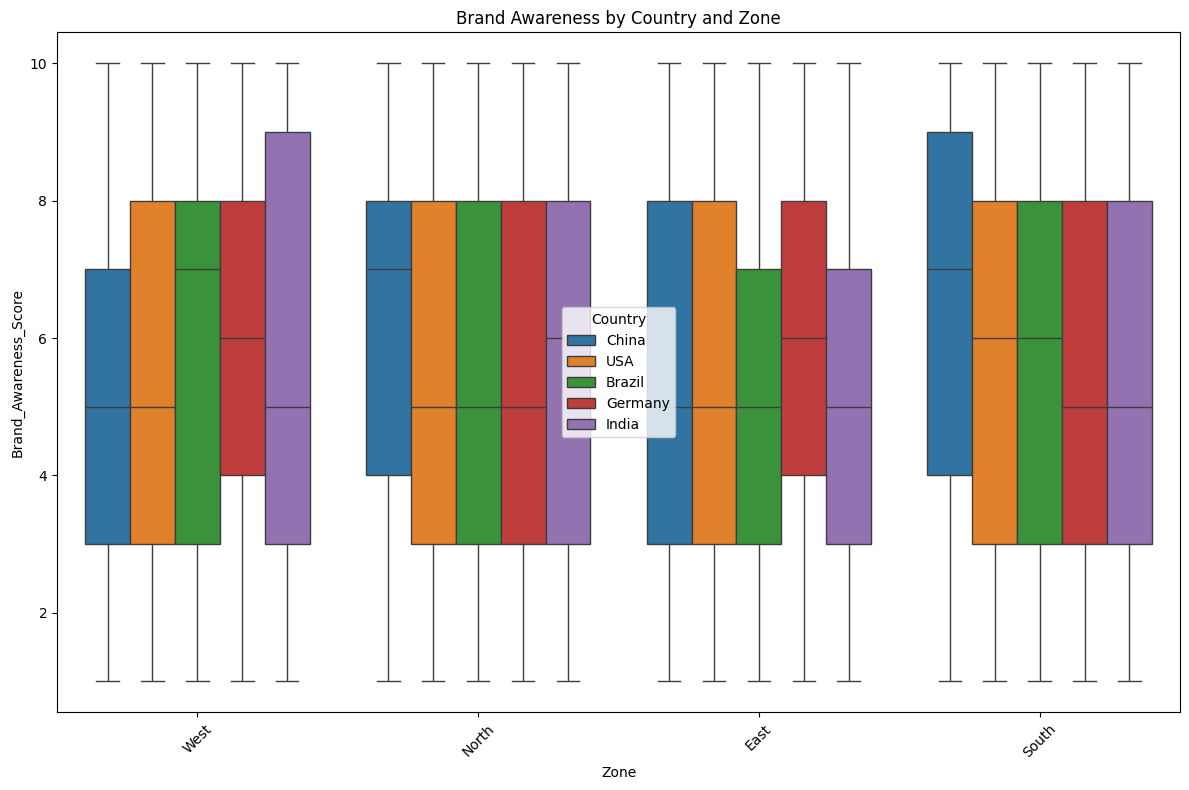

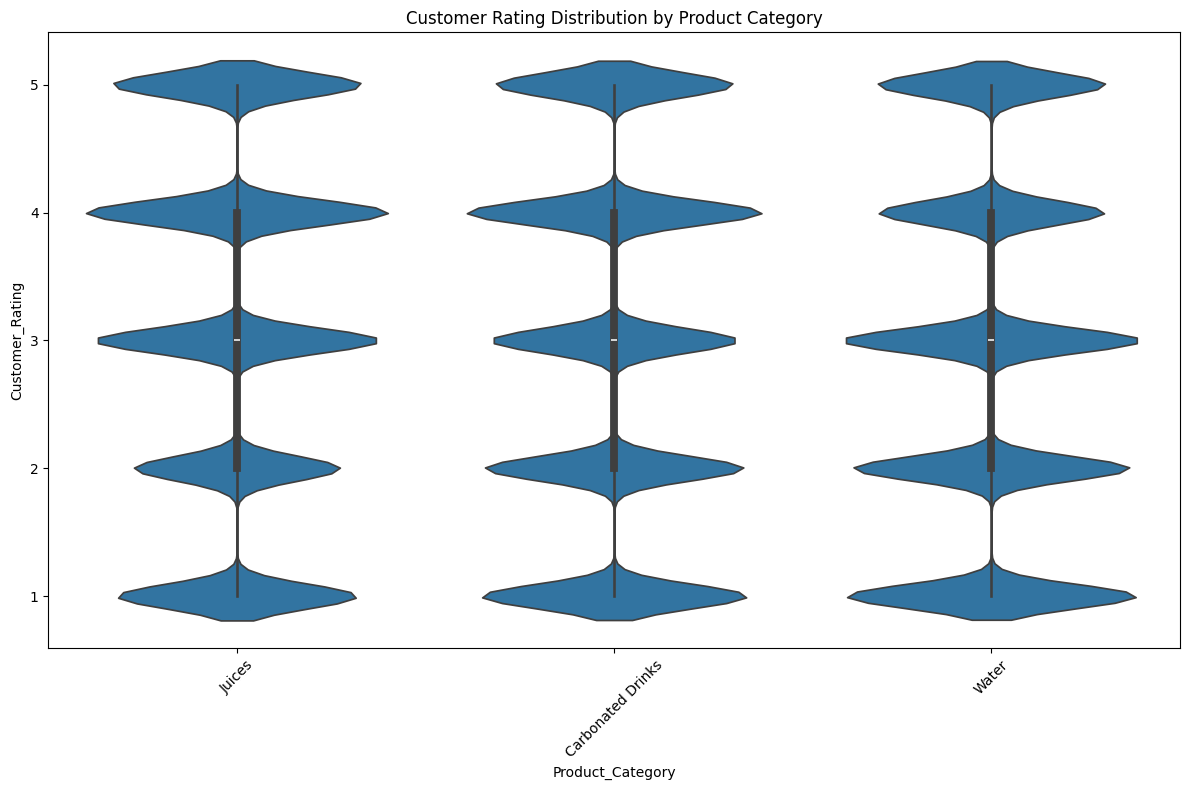

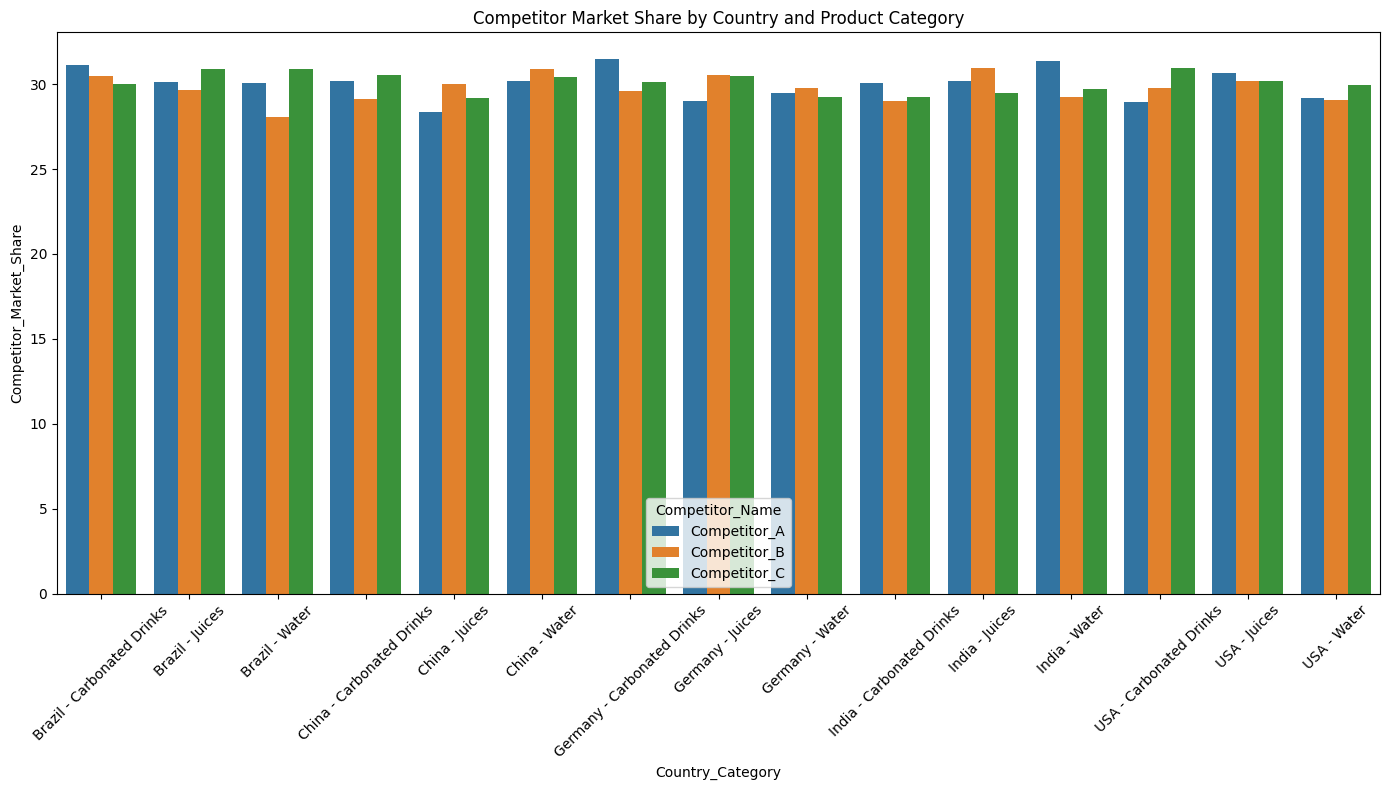

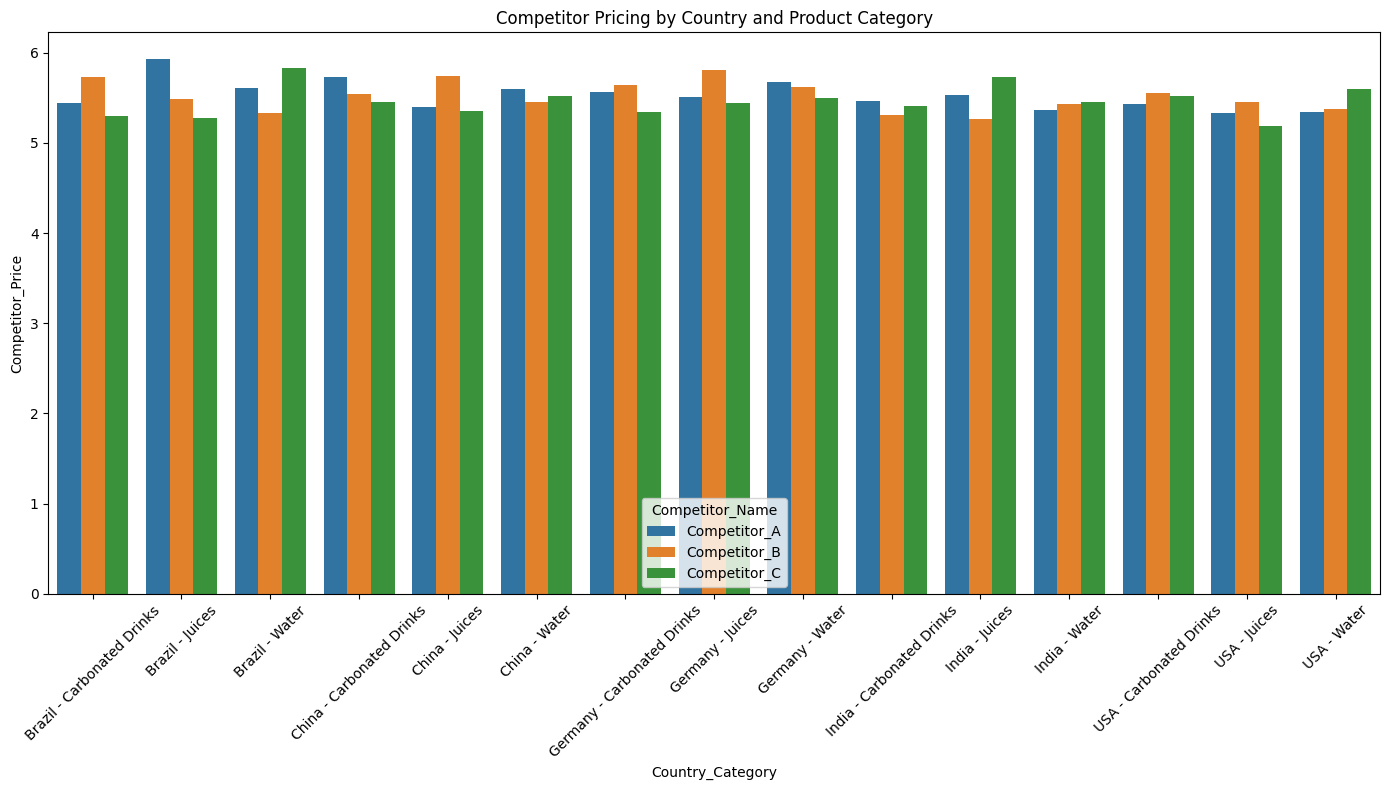

Most Profitable Country, Zone, and Category:
Country                 Germany
Zone                      South
Product_Category          Water
Profit              91709528.16
Name: 32, dtype: object

Least Profitable Country, Zone, and Category:
Country                   India
Zone                      South
Product_Category          Water
Profit              20464153.92
Name: 44, dtype: object

Competitive Analysis Summary:
    Country Competitor_Name Competitor_Product_Category  Competitor_Price  \
0    Brazil    Competitor_A           Carbonated Drinks          5.446625   
1    Brazil    Competitor_A                      Juices          5.929956   
2    Brazil    Competitor_A                       Water          5.608331   
3    Brazil    Competitor_B           Carbonated Drinks          5.728686   
4    Brazil    Competitor_B                      Juices          5.488280   
5    Brazil    Competitor_B                       Water          5.331410   
6    Brazil    Competitor_C       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
file_path = "/content/sample_data/data.xlsx"

# Load datasets
data_sales = pd.read_excel(file_path, sheet_name="Sales_Data")
data_marketing = pd.read_excel(file_path, sheet_name="Marketing_Data")
data_feedback = pd.read_excel(file_path, sheet_name="Customer_Feedback_Data")
data_competitor = pd.read_excel(file_path, sheet_name="Competitor_Data")

# Step 2: Data Cleaning
for df in [data_sales, data_marketing, data_feedback, data_competitor]:
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)

# Standardize date format
for df in [data_sales, data_marketing, data_feedback]:
    df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Merge Datasets
merged_data = data_sales.merge(
    data_marketing, on=['Country', 'Zone', 'Date'], how='inner'
).merge(
    data_feedback, on=['Country', 'Zone', 'Product_Category', 'Date'], how='inner'
).merge(
    data_competitor, on=['Country', 'Zone'], how='inner'
)

# Step 4: Profitability Analysis
merged_data['Profit'] = merged_data['Revenue'] - merged_data['Cost_of_Goods_Sold']

# Group by Country, Zone, and Product Category for detailed analysis
profitability = merged_data.groupby(['Country', 'Zone', 'Product_Category'])['Profit'].sum().reset_index()

# Identify most and least profitable combinations
most_profitable = profitability.loc[profitability['Profit'].idxmax()]
least_profitable = profitability.loc[profitability['Profit'].idxmin()]

# Combine Country and Zone for better granularity in visualization
profitability['Country_Zone'] = profitability['Country'] + " - " + profitability['Zone']

# Visualization: Profitability by Country, Zone, and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=profitability, x='Country_Zone', y='Profit', hue='Product_Category', errorbar=None)
plt.title('Profitability by Country, Zone, and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Brand Popularity Analysis
correlation_data = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Between Brand Metrics')
plt.tight_layout()
plt.show()

# Additional Visualization: Brand Awareness by Country and Zone
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='Zone', y='Brand_Awareness_Score', hue='Country')
plt.title('Brand Awareness by Country and Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Customer Rating Distribution by Product Category
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_data, x='Product_Category', y='Customer_Rating')
plt.title('Customer Rating Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Competitive Positioning
competitor_analysis = merged_data.groupby(['Country', 'Competitor_Name', 'Competitor_Product_Category']).agg({
    'Competitor_Price': 'mean',
    'Competitor_Market_Share': 'mean'
}).reset_index()

# Combine Country and Competitor Product Category for better granularity in visualization
competitor_analysis['Country_Category'] = competitor_analysis['Country'] + " - " + competitor_analysis['Competitor_Product_Category']

# Visualization: Competitor Market Share by Country and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=competitor_analysis, x='Country_Category', y='Competitor_Market_Share', hue='Competitor_Name', errorbar=None)
plt.title('Competitor Market Share by Country and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Competitor Pricing by Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=competitor_analysis, x='Country_Category', y='Competitor_Price', hue='Competitor_Name', errorbar=None)
plt.title('Competitor Pricing by Country and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Recommendations
print("Most Profitable Country, Zone, and Category:")
print(most_profitable)

print("\nLeast Profitable Country, Zone, and Category:")
print(least_profitable)

print("\nCompetitive Analysis Summary:")
print(competitor_analysis)

# Save cleaned dataset
merged_data.to_csv("Cleaned_Merged_Dataset.csv", index=False)


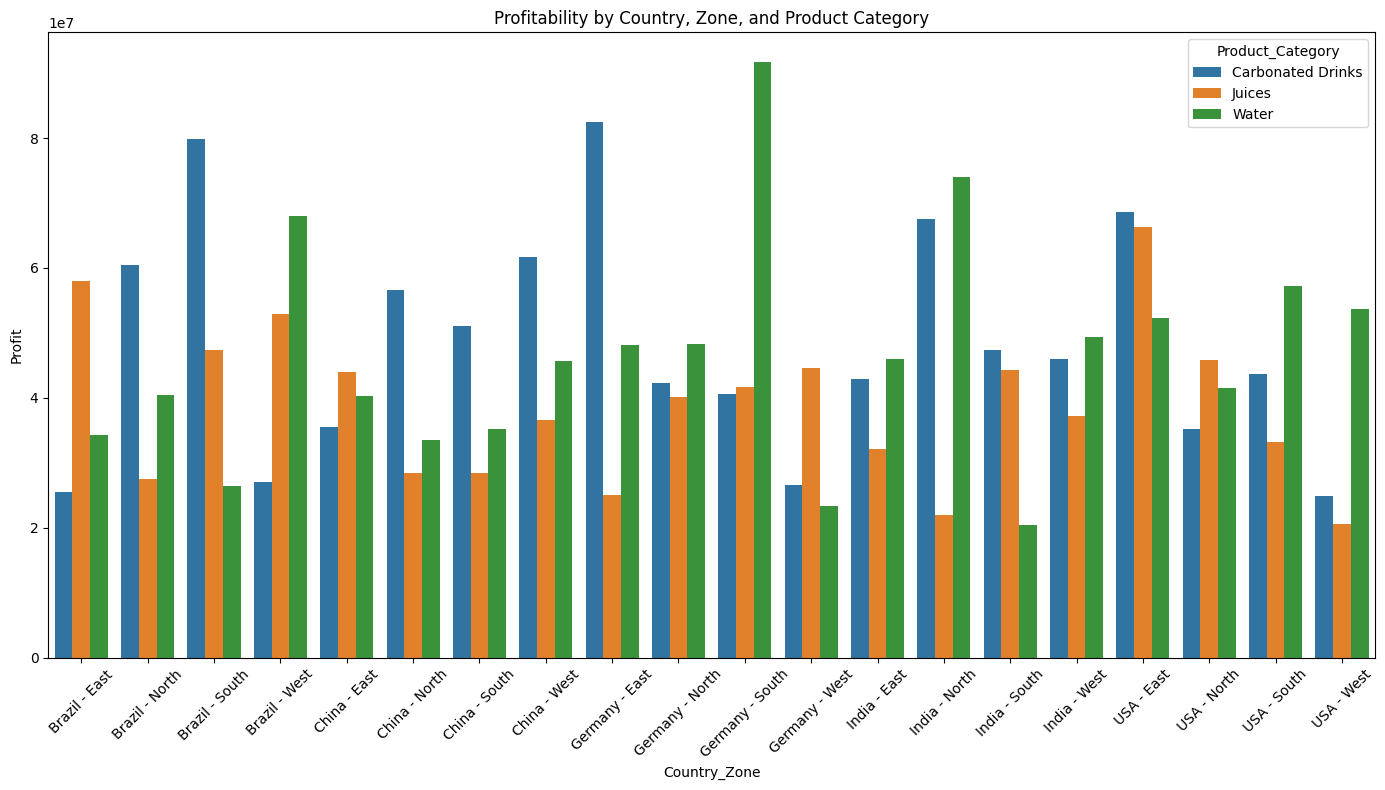

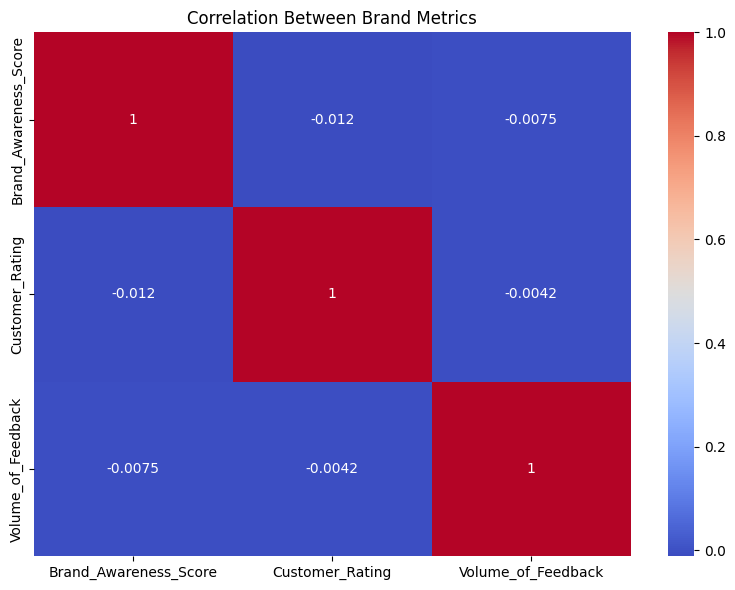

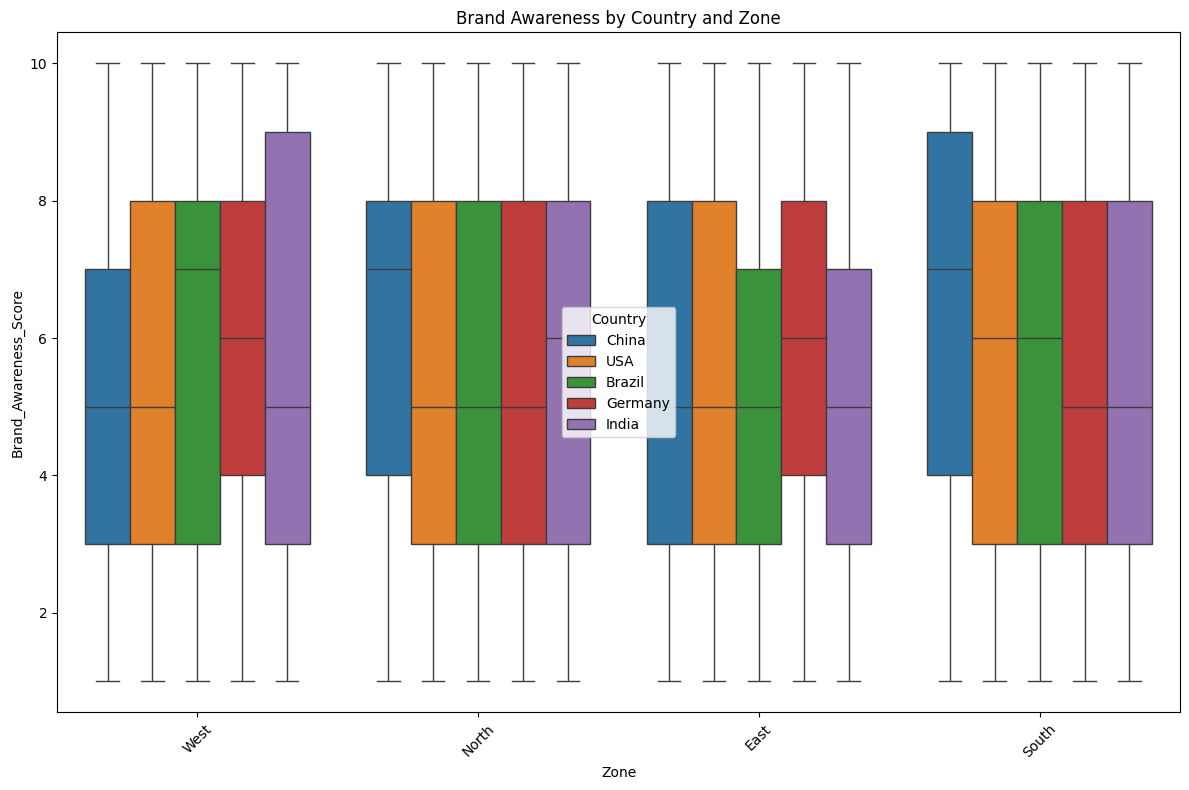

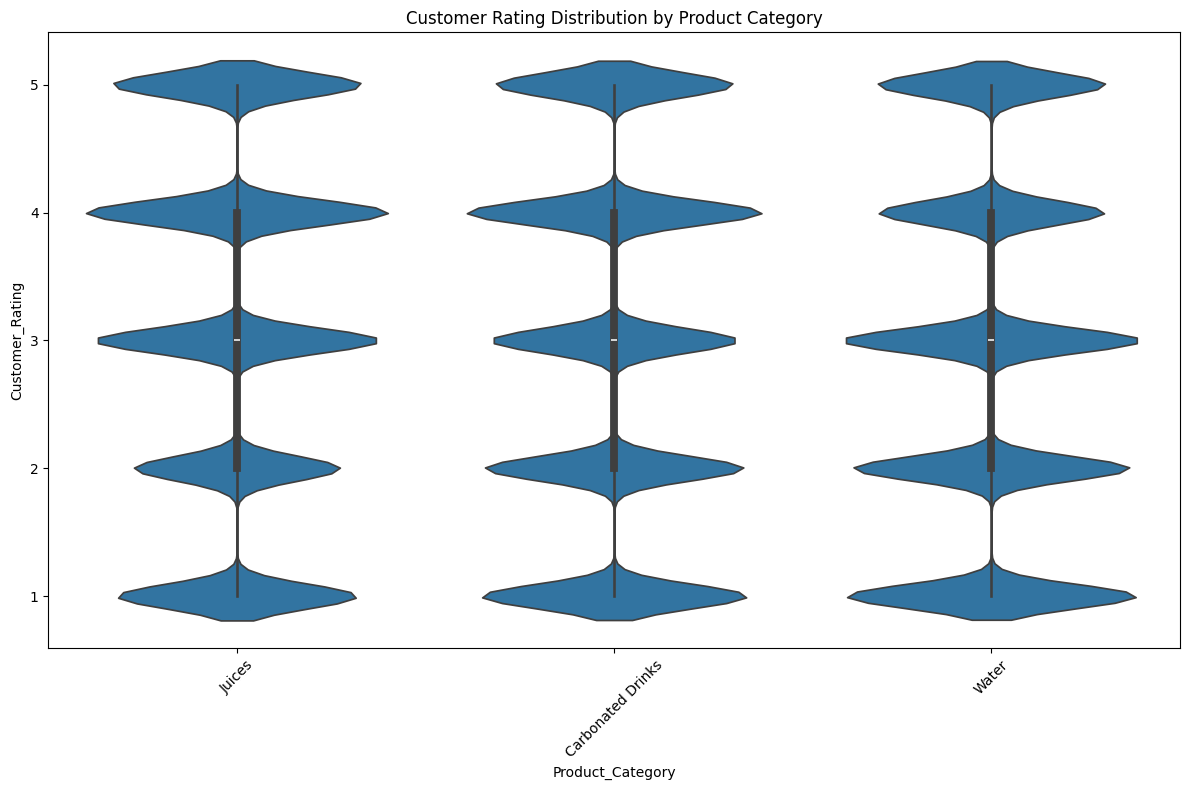

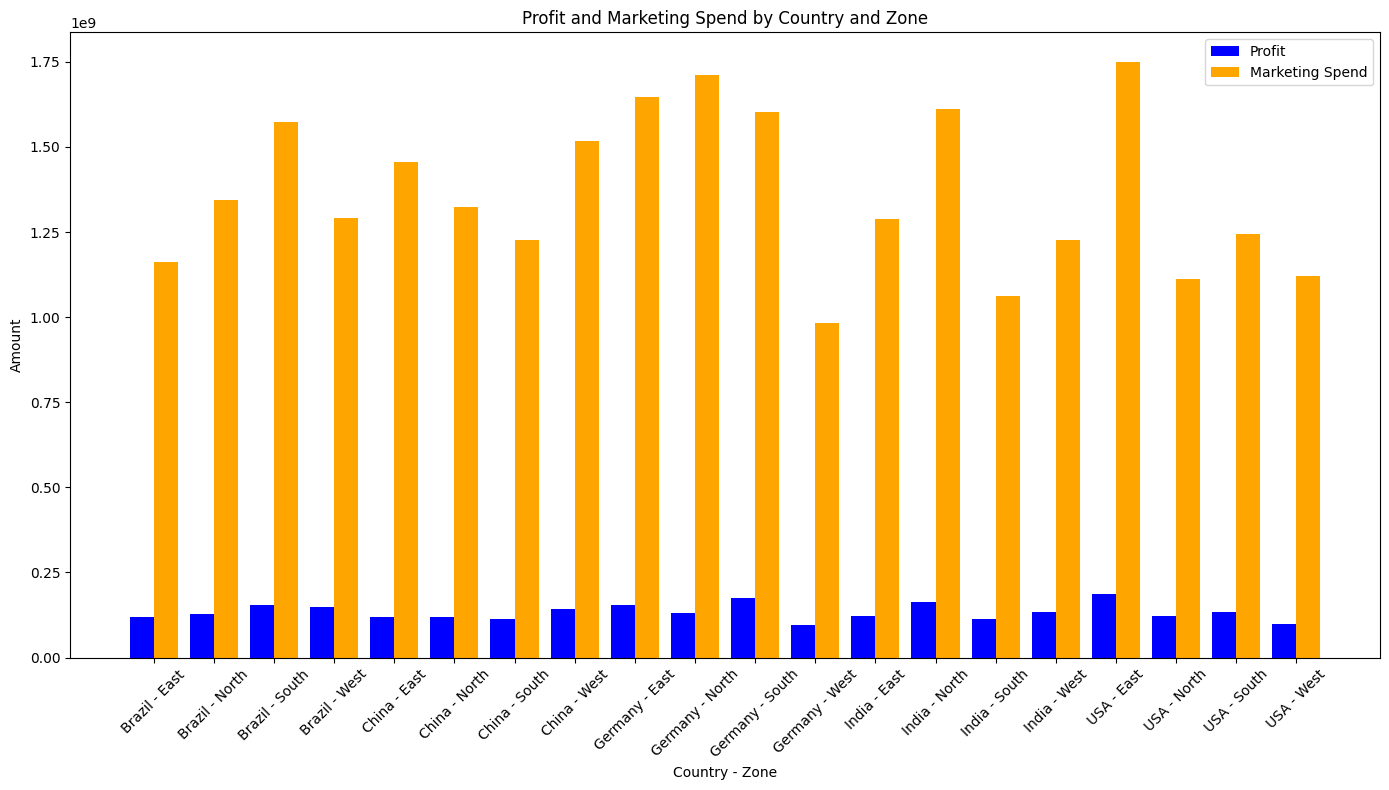

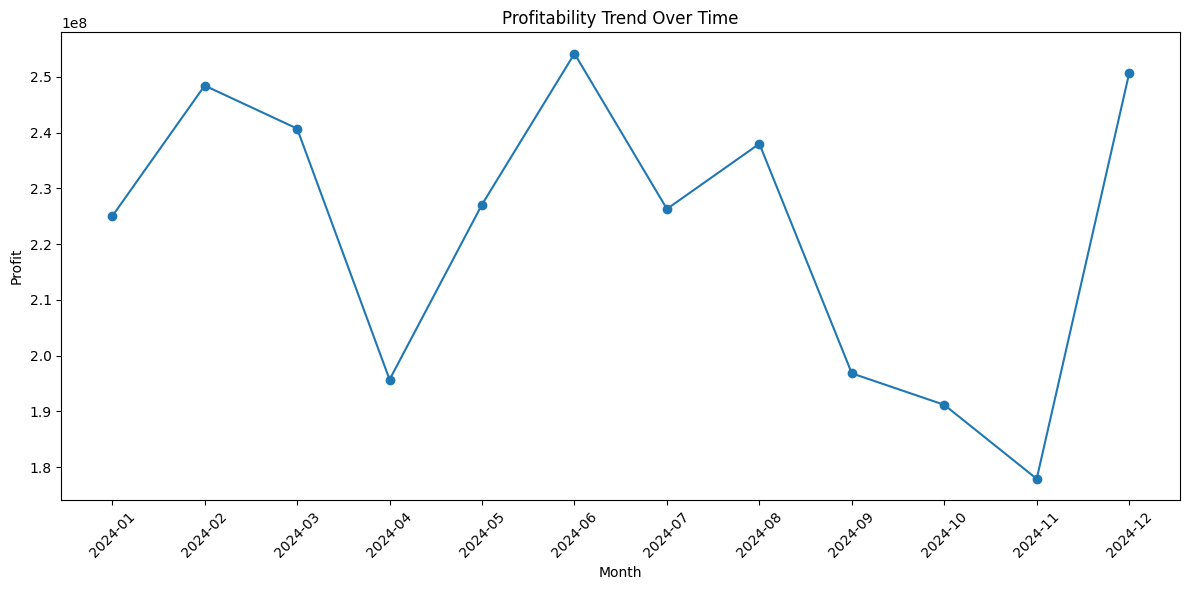

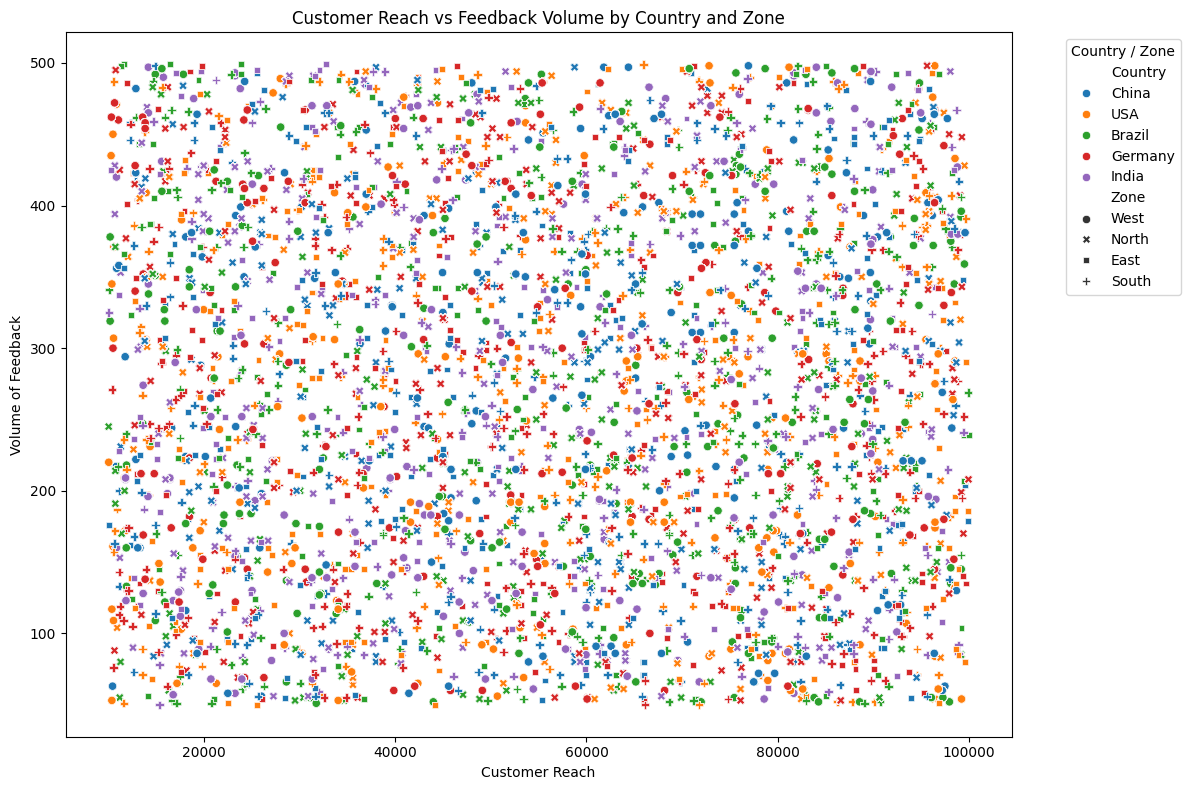

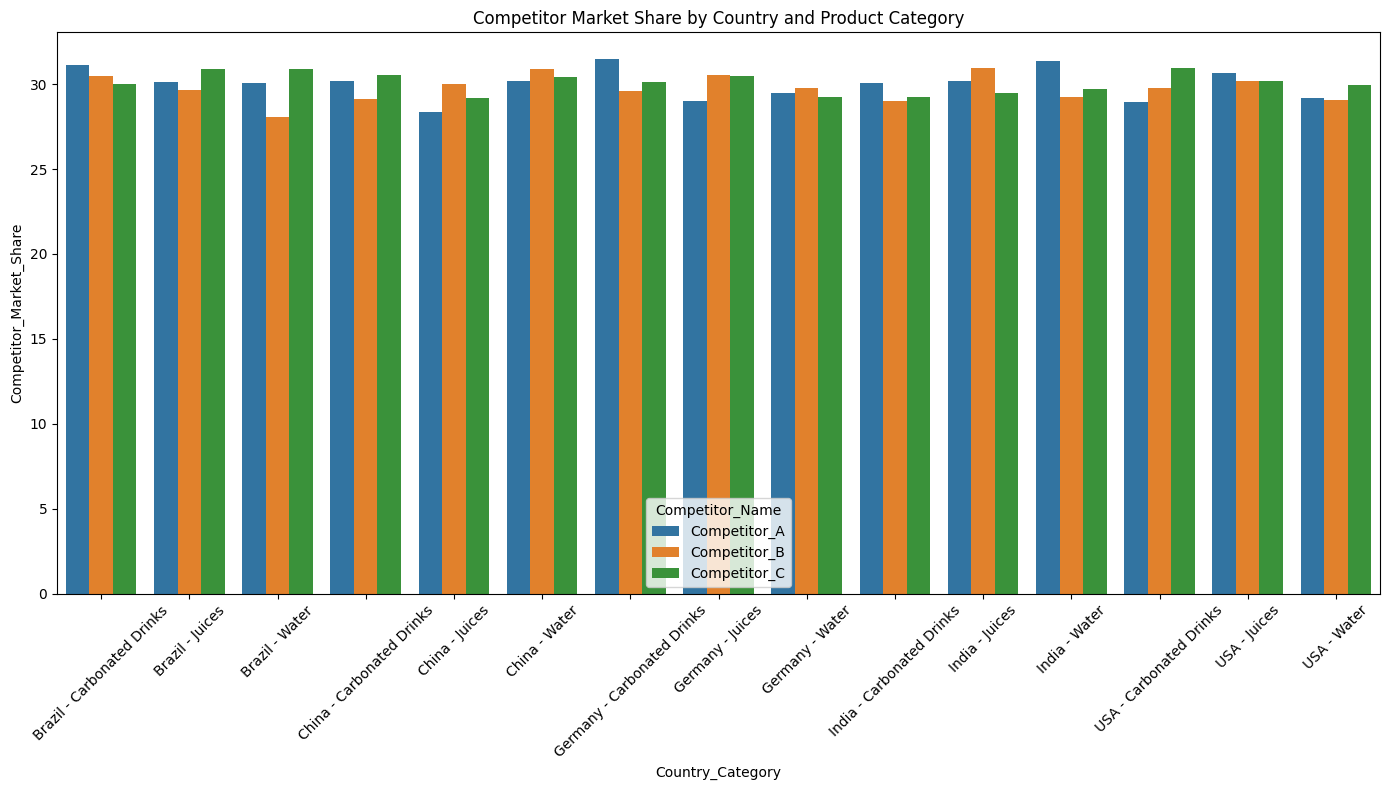

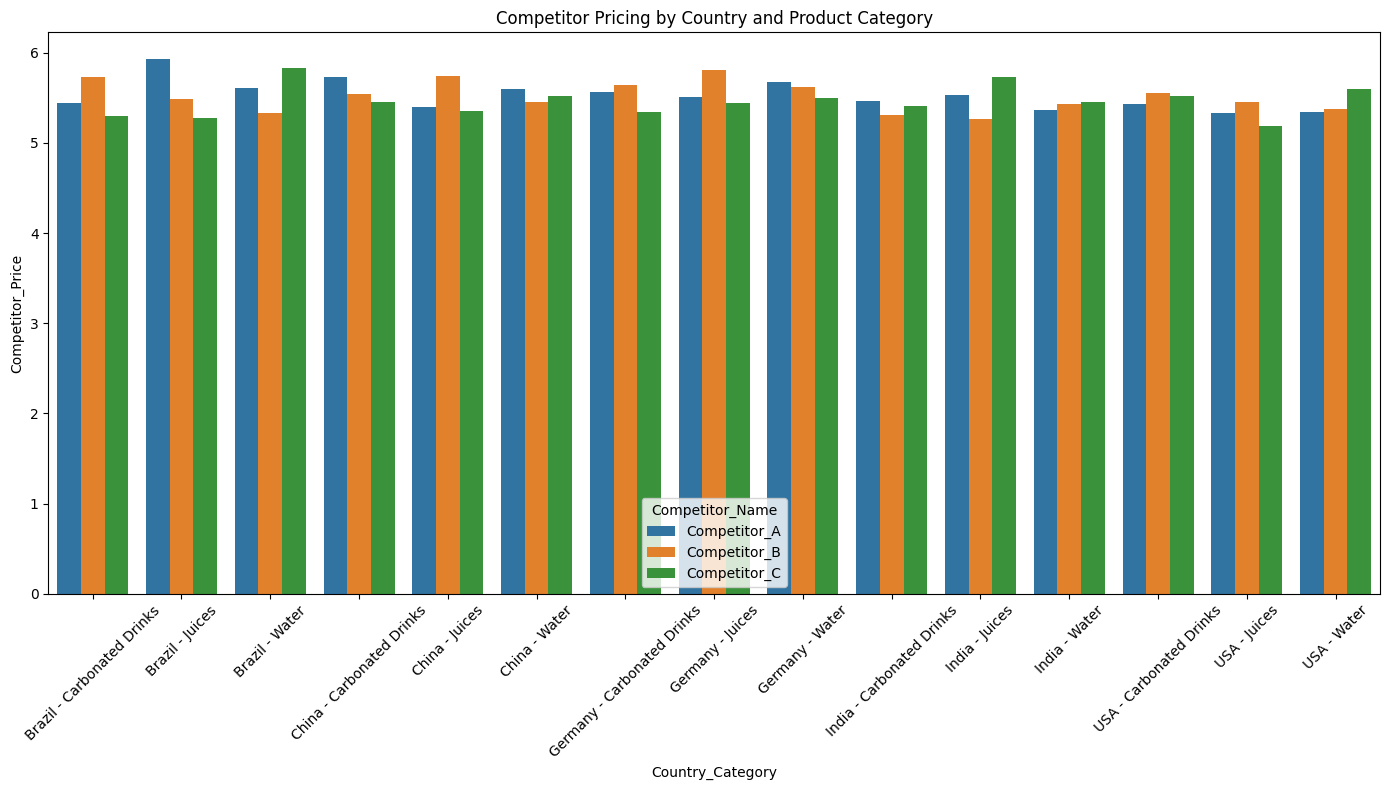

Most Profitable Country, Zone, and Category:
Country                 Germany
Zone                      South
Product_Category          Water
Profit              91709528.16
Name: 32, dtype: object

Least Profitable Country, Zone, and Category:
Country                   India
Zone                      South
Product_Category          Water
Profit              20464153.92
Name: 44, dtype: object

Competitive Analysis Summary:
    Country Competitor_Name Competitor_Product_Category  Competitor_Price  \
0    Brazil    Competitor_A           Carbonated Drinks          5.446625   
1    Brazil    Competitor_A                      Juices          5.929956   
2    Brazil    Competitor_A                       Water          5.608331   
3    Brazil    Competitor_B           Carbonated Drinks          5.728686   
4    Brazil    Competitor_B                      Juices          5.488280   
5    Brazil    Competitor_B                       Water          5.331410   
6    Brazil    Competitor_C       

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
file_path = "/content/sample_data/data.xlsx"

# Load datasets
data_sales = pd.read_excel(file_path, sheet_name="Sales_Data")
data_marketing = pd.read_excel(file_path, sheet_name="Marketing_Data")
data_feedback = pd.read_excel(file_path, sheet_name="Customer_Feedback_Data")
data_competitor = pd.read_excel(file_path, sheet_name="Competitor_Data")

# Step 2: Data Cleaning
for df in [data_sales, data_marketing, data_feedback, data_competitor]:
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)

# Standardize date format
for df in [data_sales, data_marketing, data_feedback]:
    df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Merge Datasets
merged_data = data_sales.merge(
    data_marketing, on=['Country', 'Zone', 'Date'], how='inner'
).merge(
    data_feedback, on=['Country', 'Zone', 'Product_Category', 'Date'], how='inner'
).merge(
    data_competitor, on=['Country', 'Zone'], how='inner'
)

# Step 4: Profitability Analysis
merged_data['Profit'] = merged_data['Revenue'] - merged_data['Cost_of_Goods_Sold']

# Group by Country, Zone, and Product Category for detailed analysis
profitability = merged_data.groupby(['Country', 'Zone', 'Product_Category'])['Profit'].sum().reset_index()

# Identify most and least profitable combinations
most_profitable = profitability.loc[profitability['Profit'].idxmax()]
least_profitable = profitability.loc[profitability['Profit'].idxmin()]

# Combine Country and Zone for better granularity in visualization
profitability['Country_Zone'] = profitability['Country'] + " - " + profitability['Zone']

# Visualization: Profitability by Country, Zone, and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=profitability, x='Country_Zone', y='Profit', hue='Product_Category', errorbar=None)
plt.title('Profitability by Country, Zone, and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Brand Popularity Analysis
correlation_data = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Between Brand Metrics')
plt.tight_layout()
plt.show()

# Additional Visualization: Brand Awareness by Country and Zone
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='Zone', y='Brand_Awareness_Score', hue='Country')
plt.title('Brand Awareness by Country and Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Customer Rating Distribution by Product Category
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_data, x='Product_Category', y='Customer_Rating')
plt.title('Customer Rating Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Profit and Marketing Spend by Country and Zone
profit_marketing = merged_data.groupby(['Country', 'Zone']).agg({
    'Profit': 'sum',
    'Marketing_Spend': 'sum'
}).reset_index()

# Combine Country and Zone for better granularity
profit_marketing['Country_Zone'] = profit_marketing['Country'] + " - " + profit_marketing['Zone']

# Plot side-by-side bars for Profit and Marketing Spend
plt.figure(figsize=(14, 8))
bar_width = 0.4  # Width of each bar
x_positions = range(len(profit_marketing))  # X positions for bars

# Plot Profit
plt.bar([x - bar_width / 2 for x in x_positions], profit_marketing['Profit'], width=bar_width, label='Profit', color='blue')

# Plot Marketing Spend
plt.bar([x + bar_width / 2 for x in x_positions], profit_marketing['Marketing_Spend'], width=bar_width, label='Marketing Spend', color='orange')

# Add labels and title
plt.xticks(x_positions, profit_marketing['Country_Zone'], rotation=45)
plt.title('Profit and Marketing Spend by Country and Zone')
plt.xlabel('Country - Zone')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


# Additional Visualization: Trend Analysis for Profitability
merged_data['Month'] = merged_data['Date'].dt.to_period('M')
profit_trend = merged_data.groupby('Month')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(profit_trend['Month'].astype(str), profit_trend['Profit'], marker='o')
plt.title('Profitability Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Customer Reach vs Feedback Volume by Country and Zone
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=merged_data,
    x='Customer_Reach',
    y='Volume_of_Feedback',
    hue='Country',
    style='Zone',
    palette='tab10'
)
plt.title('Customer Reach vs Feedback Volume by Country and Zone')
plt.xlabel('Customer Reach')
plt.ylabel('Volume of Feedback')
plt.legend(title='Country / Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Step 6: Competitive Positioning
competitor_analysis = merged_data.groupby(['Country', 'Competitor_Name', 'Competitor_Product_Category']).agg({
    'Competitor_Price': 'mean',
    'Competitor_Market_Share': 'mean'
}).reset_index()

# Combine Country and Competitor Product Category for better granularity in visualization
competitor_analysis['Country_Category'] = competitor_analysis['Country'] + " - " + competitor_analysis['Competitor_Product_Category']

# Visualization: Competitor Market Share by Country and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=competitor_analysis, x='Country_Category', y='Competitor_Market_Share', hue='Competitor_Name', errorbar=None)
plt.title('Competitor Market Share by Country and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Competitor Pricing by Country and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=competitor_analysis, x='Country_Category', y='Competitor_Price', hue='Competitor_Name', errorbar=None)
plt.title('Competitor Pricing by Country and Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Recommendations
print("Most Profitable Country, Zone, and Category:")
print(most_profitable)

print("\nLeast Profitable Country, Zone, and Category:")
print(least_profitable)

print("\nCompetitive Analysis Summary:")
print(competitor_analysis)

# Save cleaned dataset
merged_data.to_csv("Cleaned_Merged_Dataset.csv", index=False)


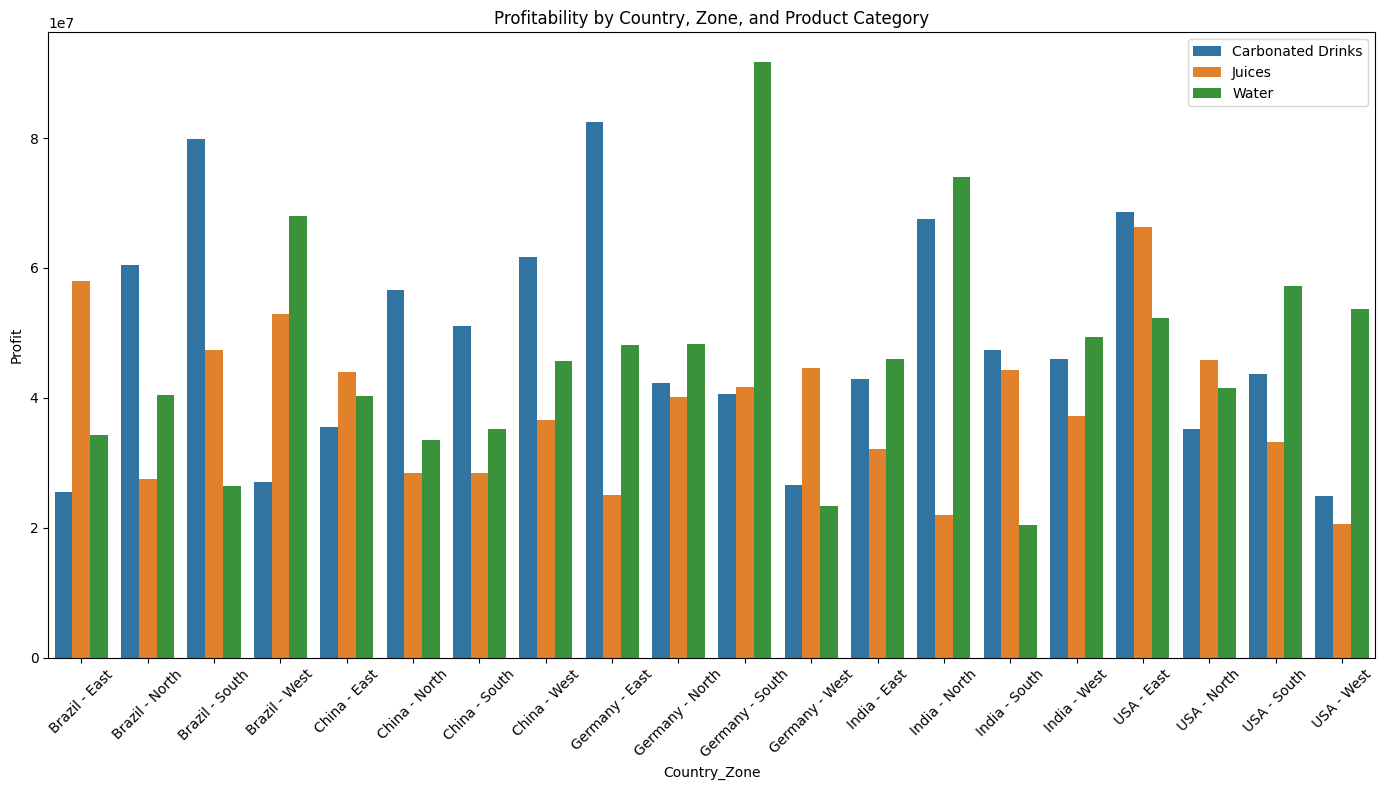

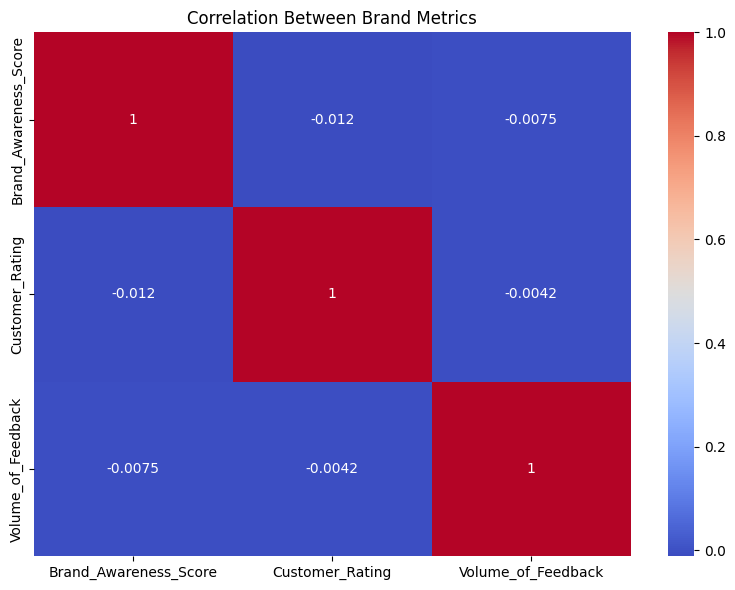

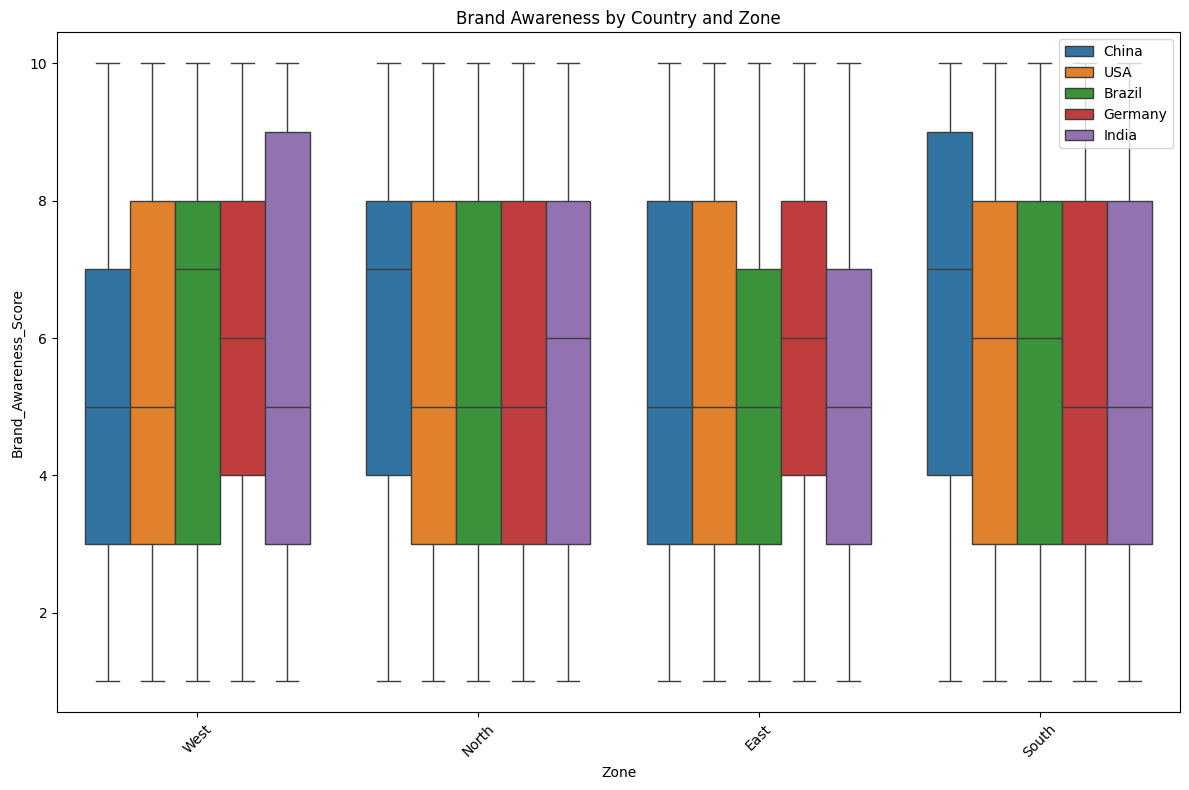

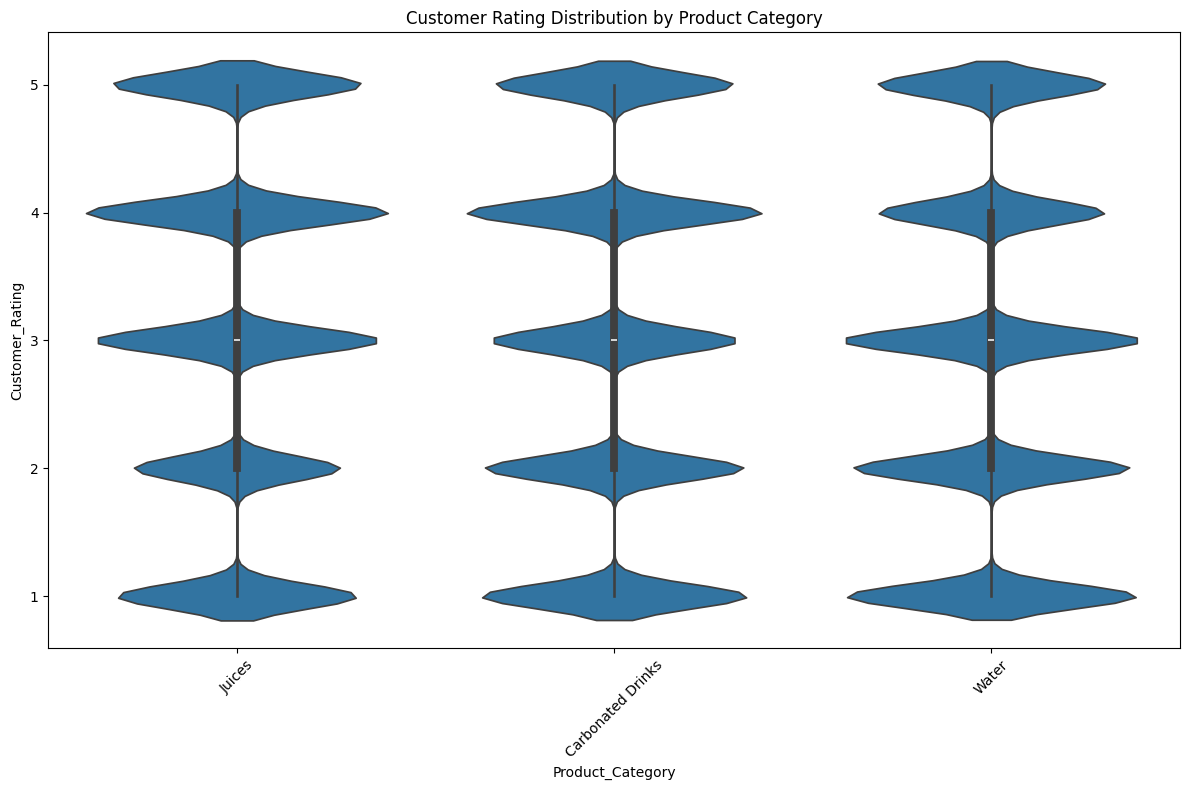

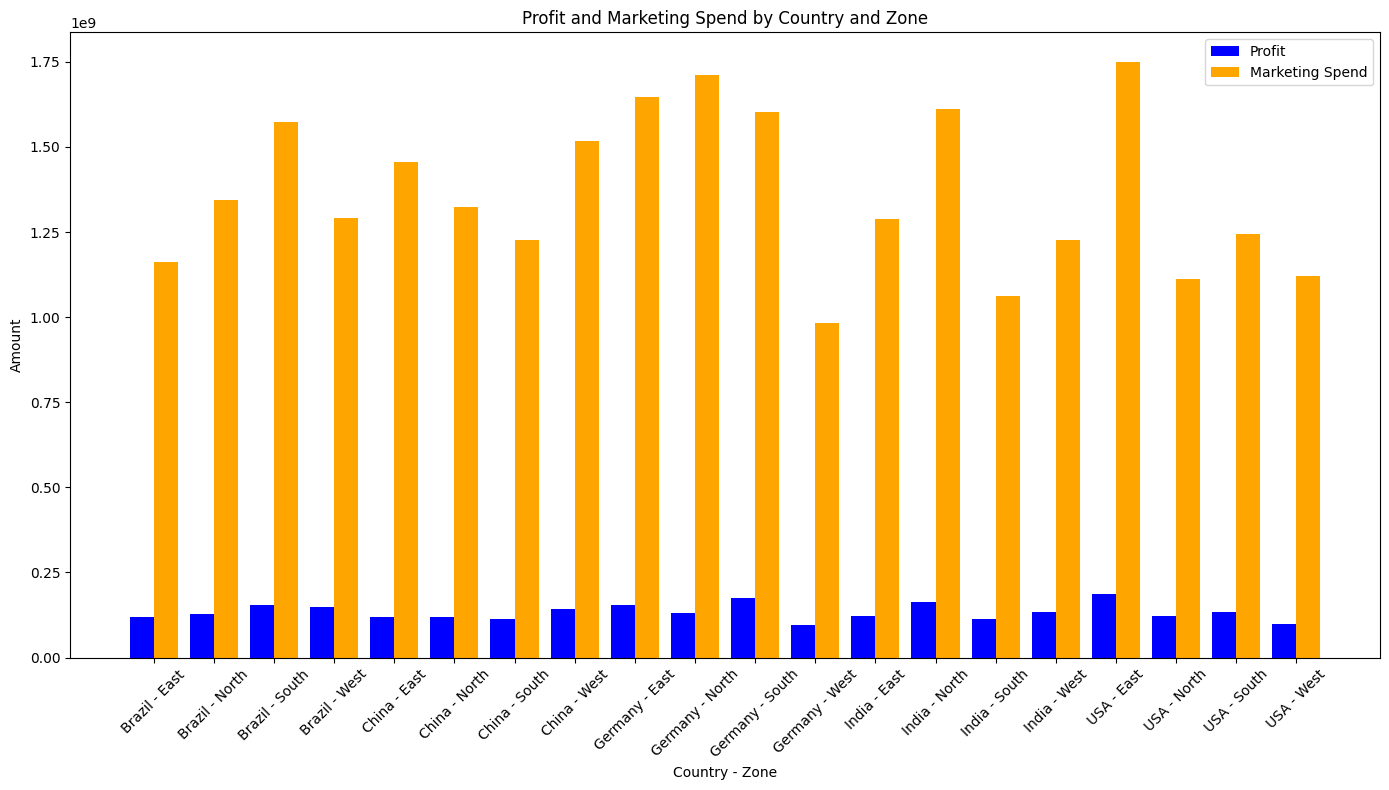

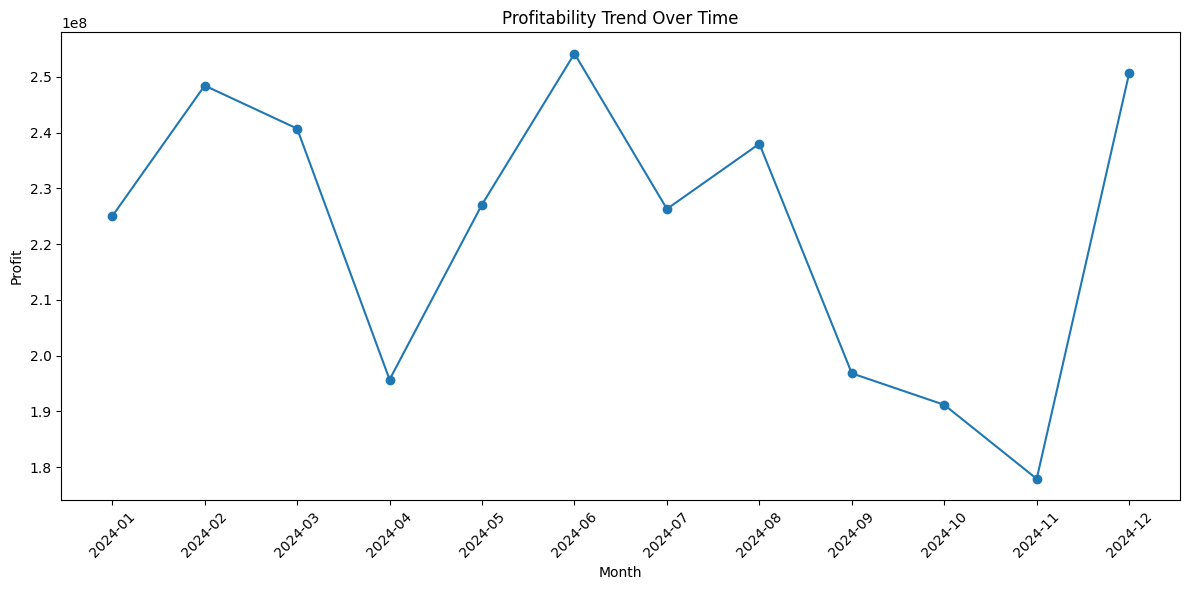

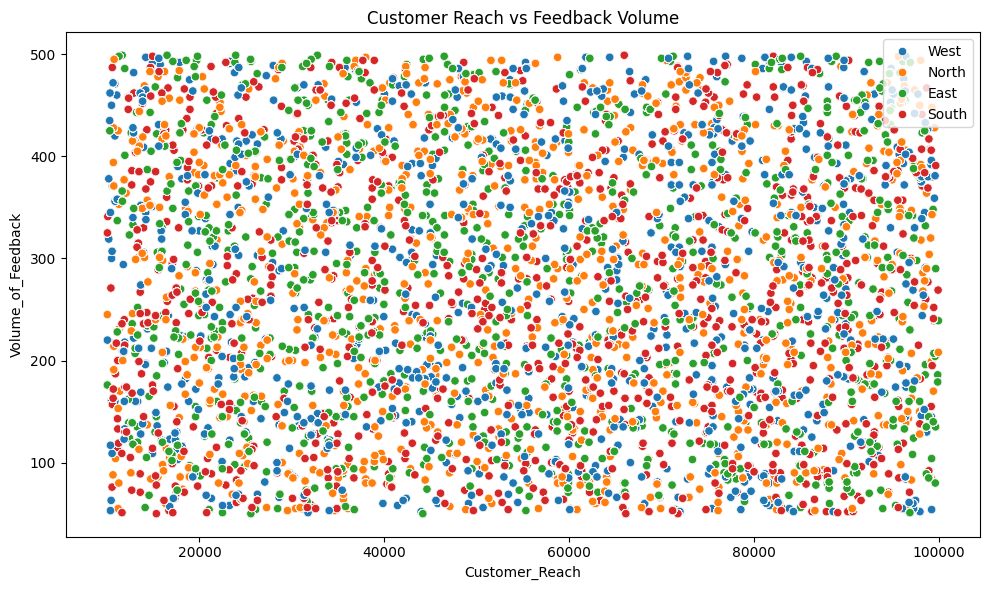

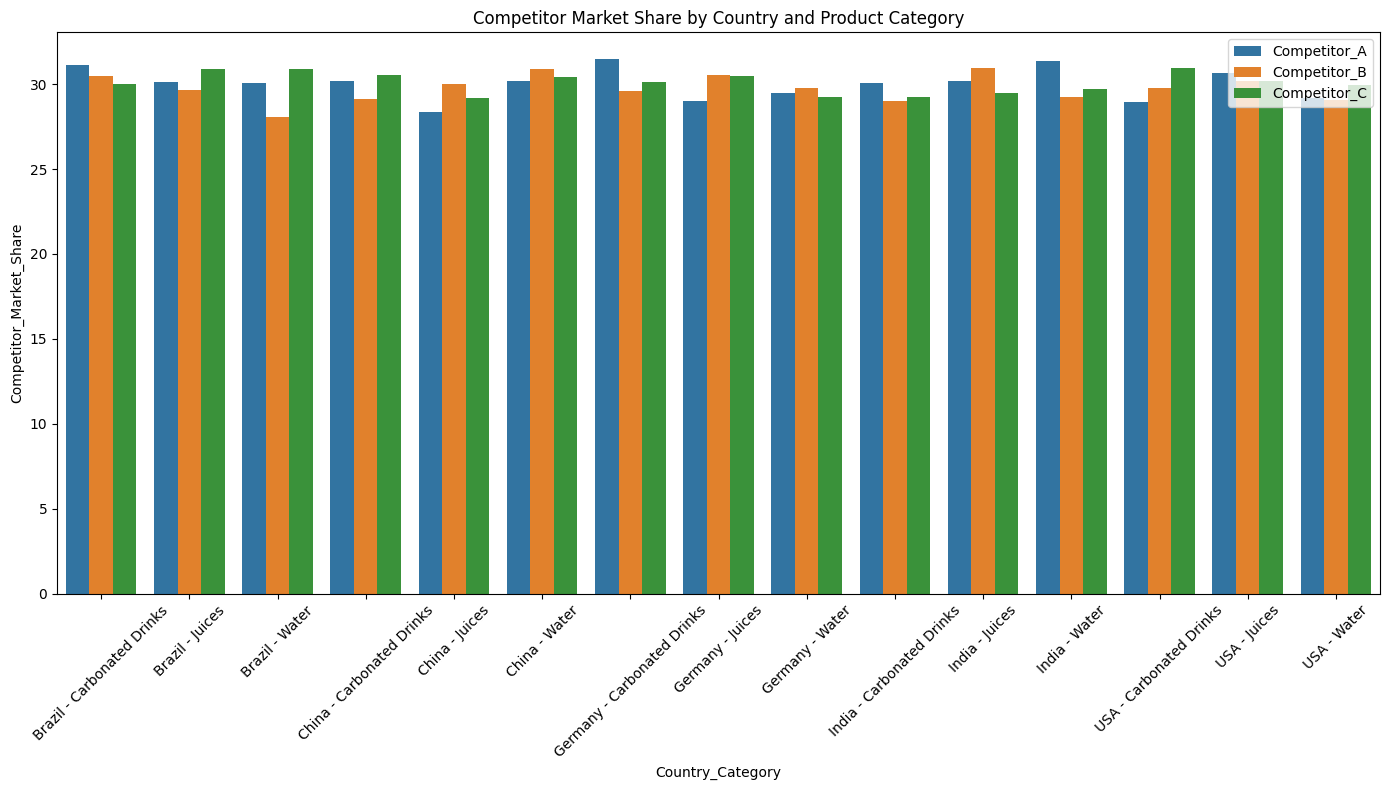

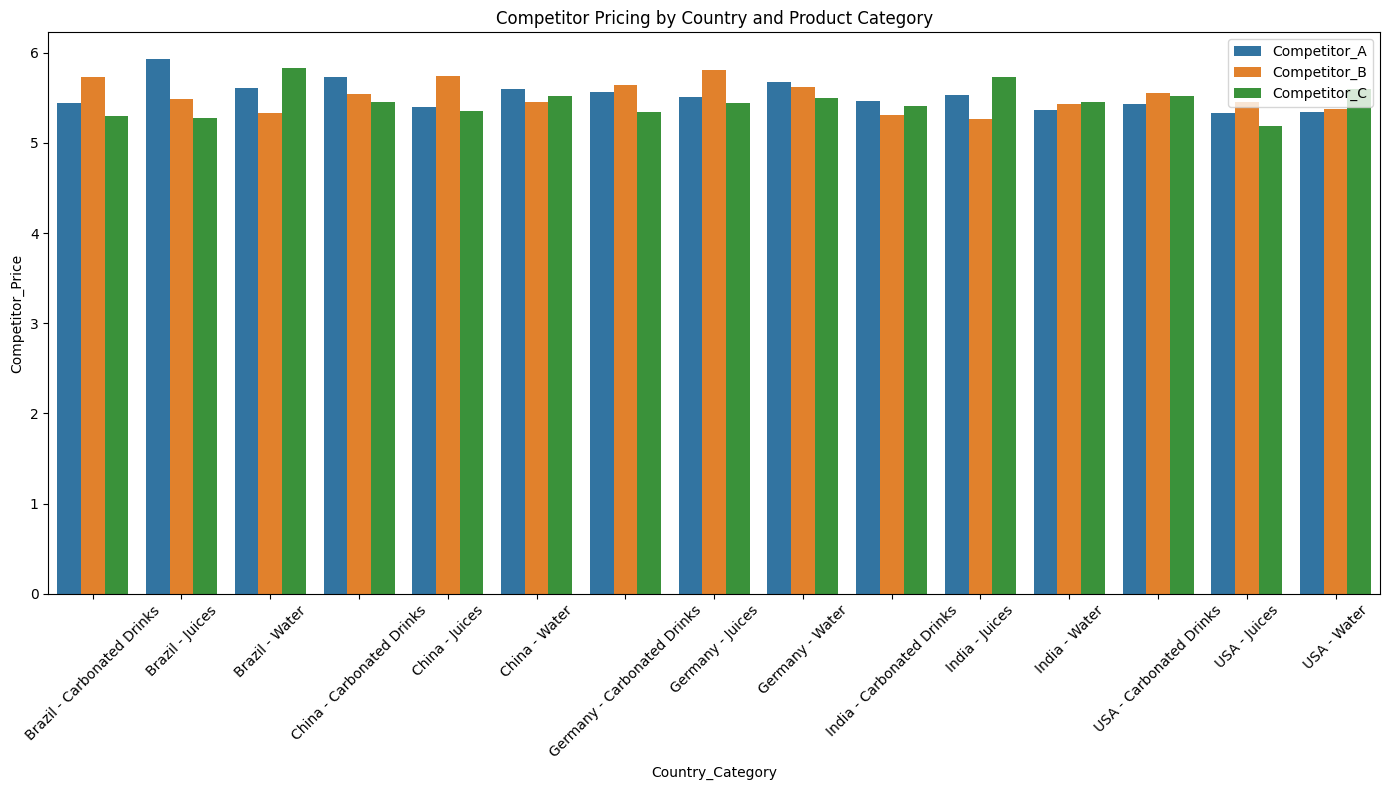

--- Recommendations Report ---
Key Findings:
1. The most profitable country, zone, and category are: Germany - South - Water with a profit of 91709528.16.
2. The least profitable country, zone, and category are: India - South - Water with a profit of 20464153.92.
3. Correlation Analysis:
                       Brand_Awareness_Score  Customer_Rating  \
Brand_Awareness_Score               1.000000        -0.011532   
Customer_Rating                    -0.011532         1.000000   
Volume_of_Feedback                 -0.007494        -0.004209   

                       Volume_of_Feedback  
Brand_Awareness_Score           -0.007494  
Customer_Rating                 -0.004209  
Volume_of_Feedback               1.000000  
4. Competitor Analysis Summary:
    Country Competitor_Name Competitor_Product_Category  Competitor_Price  \
0    Brazil    Competitor_A           Carbonated Drinks          5.446625   
1    Brazil    Competitor_A                      Juices          5.929956   
2    Brazil

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
file_path = "/content/sample_data/data.xlsx"

# Load datasets
data_sales = pd.read_excel(file_path, sheet_name="Sales_Data")
data_marketing = pd.read_excel(file_path, sheet_name="Marketing_Data")
data_feedback = pd.read_excel(file_path, sheet_name="Customer_Feedback_Data")
data_competitor = pd.read_excel(file_path, sheet_name="Competitor_Data")

# Step 2: Data Cleaning
for df in [data_sales, data_marketing, data_feedback, data_competitor]:
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)

# Standardize date format
for df in [data_sales, data_marketing, data_feedback]:
    df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Merge Datasets
merged_data = data_sales.merge(
    data_marketing, on=['Country', 'Zone', 'Date'], how='inner'
).merge(
    data_feedback, on=['Country', 'Zone', 'Product_Category', 'Date'], how='inner'
).merge(
    data_competitor, on=['Country', 'Zone'], how='inner'
)

# Step 4: Profitability Analysis
merged_data['Profit'] = merged_data['Revenue'] - merged_data['Cost_of_Goods_Sold']
profitability = merged_data.groupby(['Country', 'Zone', 'Product_Category'])['Profit'].sum().reset_index()

# Identify most and least profitable
most_profitable = profitability.loc[profitability['Profit'].idxmax()]
least_profitable = profitability.loc[profitability['Profit'].idxmin()]

# Combine Country and Zone for better granularity in visualization
profitability['Country_Zone'] = profitability['Country'] + " - " + profitability['Zone']

# Visualization: Profitability by Country, Zone, and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=profitability, x='Country_Zone', y='Profit', hue='Product_Category', errorbar=None)
plt.title('Profitability by Country, Zone, and Product Category')
plt.xticks(rotation=45)
plt.legend(loc='upper right')  # Explicitly setting legend location
plt.tight_layout()
plt.show()

# Step 5: Brand Popularity Analysis
correlation_data = merged_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Between Brand Metrics')
plt.tight_layout()
plt.show()

# Additional Visualization: Brand Awareness by Country and Zone
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_data, x='Zone', y='Brand_Awareness_Score', hue='Country')
plt.title('Brand Awareness by Country and Zone')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Additional Visualization: Customer Rating Distribution by Product Category
plt.figure(figsize=(12, 8))
sns.violinplot(data=merged_data, x='Product_Category', y='Customer_Rating')
plt.title('Customer Rating Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Profit and Marketing Spend by Country and Zone
profit_marketing = merged_data.groupby(['Country', 'Zone']).agg({
    'Profit': 'sum',
    'Marketing_Spend': 'sum'
}).reset_index()

profit_marketing['Country_Zone'] = profit_marketing['Country'] + " - " + profit_marketing['Zone']
plt.figure(figsize=(14, 8))
bar_width = 0.4
x_positions = range(len(profit_marketing))

# Plot Profit
plt.bar([x - bar_width / 2 for x in x_positions], profit_marketing['Profit'], width=bar_width, label='Profit', color='blue')

# Plot Marketing Spend
plt.bar([x + bar_width / 2 for x in x_positions], profit_marketing['Marketing_Spend'], width=bar_width, label='Marketing Spend', color='orange')

plt.xticks(x_positions, profit_marketing['Country_Zone'], rotation=45)
plt.title('Profit and Marketing Spend by Country and Zone')
plt.xlabel('Country - Zone')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# Additional Visualization: Trend Analysis for Profitability
merged_data['Month'] = merged_data['Date'].dt.to_period('M')
profit_trend = merged_data.groupby('Month')['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(profit_trend['Month'].astype(str), profit_trend['Profit'], marker='o')
plt.title('Profitability Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional Visualization: Customer Reach vs Feedback Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Customer_Reach', y='Volume_of_Feedback', hue='Zone')
plt.title('Customer Reach vs Feedback Volume')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Step 6: Competitive Positioning
competitor_analysis = merged_data.groupby(['Country', 'Competitor_Name', 'Competitor_Product_Category']).agg({
    'Competitor_Price': 'mean',
    'Competitor_Market_Share': 'mean'
}).reset_index()

# Combine Country and Competitor Product Category for better granularity in visualization
competitor_analysis['Country_Category'] = competitor_analysis['Country'] + " - " + competitor_analysis['Competitor_Product_Category']

# Visualization: Competitor Market Share by Country and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=competitor_analysis, x='Country_Category', y='Competitor_Market_Share', hue='Competitor_Name', errorbar=None)
plt.title('Competitor Market Share by Country and Product Category')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Additional Visualization: Competitor Pricing by Country and Product Category
plt.figure(figsize=(14, 8))
sns.barplot(data=competitor_analysis, x='Country_Category', y='Competitor_Price', hue='Competitor_Name', errorbar=None)
plt.title('Competitor Pricing by Country and Product Category')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Key Findings
print("--- Recommendations Report ---")

print("Key Findings:")
print(f"1. The most profitable country, zone, and category are: {most_profitable['Country']} - {most_profitable['Zone']} - {most_profitable['Product_Category']} with a profit of {most_profitable['Profit']}.")
print(f"2. The least profitable country, zone, and category are: {least_profitable['Country']} - {least_profitable['Zone']} - {least_profitable['Product_Category']} with a profit of {least_profitable['Profit']}.")

print("3. Correlation Analysis:")
print(correlation_data)

print("4. Competitor Analysis Summary:")
print(competitor_analysis)

# Recommendations
print("\nRecommendations:")
print("1. Optimize marketing spend in low-profit zones to improve profitability.")
print("2. Focus resources on high-performing product categories and replicate success strategies in underperforming zones.")
print("3. Adjust pricing strategies to remain competitive, especially in categories with low market share.")
print("4. Enhance brand awareness campaigns in regions with lower awareness scores.")
print("5. Explore operational improvements to reduce the cost of goods sold in less profitable regions.")

# Save findings to a text file
with open("Recommendations_Report.txt", "w") as file:
    file.write("--- Recommendations Report ---\n\n")
    file.write("Key Findings:\n")
    file.write(f"1. The most profitable country, zone, and category are: {most_profitable['Country']} - {most_profitable['Zone']} - {most_profitable['Product_Category']} with a profit of {most_profitable['Profit']}.\n")
    file.write(f"2. The least profitable country, zone, and category are: {least_profitable['Country']} - {least_profitable['Zone']} - {least_profitable['Product_Category']} with a profit of {least_profitable['Profit']}.\n\n")
    file.write("3. Correlation Analysis:\n")
    file.write(correlation_data.to_string())
    file.write("\n\n4. Competitor Analysis Summary:\n")
    file.write(competitor_analysis.to_string())
    file.write("\n\nRecommendations:\n")
    file.write("1. Optimize marketing spend in low-profit zones to improve profitability.\n")
    file.write("2. Focus resources on high-performing product categories and replicate success strategies in underperforming zones.\n")
    file.write("3. Adjust pricing strategies to remain competitive, especially in categories with low market share.\n")
    file.write("4. Enhance brand awareness campaigns in regions with lower awareness scores.\n")
    file.write("5. Explore operational improvements to reduce the cost of goods sold in less profitable regions.\n")
